In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Suleyyy/ML_Depresja/refs/heads/main/depresja_z_kaggla.csv").drop(columns='id')

data

Gender   Age           City Profession  Academic Pressure  \
0        Male  33.0  Visakhapatnam    Student                5.0   
1      Female  24.0      Bangalore    Student                2.0   
2        Male  31.0       Srinagar    Student                3.0   
3      Female  28.0       Varanasi    Student                3.0   
4      Female  25.0         Jaipur    Student                4.0   
...       ...   ...            ...        ...                ...   
27896  Female  27.0          Surat    Student                5.0   
27897    Male  27.0       Ludhiana    Student                2.0   
27898    Male  31.0      Faridabad    Student                3.0   
27899  Female  18.0       Ludhiana    Student                5.0   
27900    Male  27.0          Patna    Student                4.0   

       Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0                0.0  8.97                 2.0               0.0   
1                0.0  5.90                 5.0               0.0   
2                0.0  7.03                 5.0               0.0   
3                0.0  5.59                 2.0               0.0   
4                0.0  8.13                 3.0               0.0   
...              ...   ...                 ...               ...   
27896            0.0  5.75                 5.0               0.0   
27897            0.0  9.40                 3.0               0.0   
27898            0.0  6.61                 4.0               0.0   
27899            0.0  6.88                 2.0               0.0   
27900            0.0  9.24                 1.0               0.0   

            Sleep Duration Dietary Habits      Degree  \
0              '5-6 hours'        Healthy     B.Pharm   
1              '5-6 hours'       Moderate         BSc   
2      'Less than 5 hours'        Healthy          BA   
3              '7-8 hours'       Moderate         BCA   
4              '5-6 hours'       Moderate      M.Tech   
...                    ...            ...         ...   
27896          '5-6 hours'      Unhealthy  'Class 12'   
27897  'Less than 5 hours'        Healthy         MSc   
27898          '5-6 hours'      Unhealthy          MD   
27899  'Less than 5 hours'        Healthy  'Class 12'   
27900  'Less than 5 hours'        Healthy         BCA   

      Have you ever had suicidal thoughts ?  Work/Study Hours  \
0                                       Yes               3.0   
1                                        No               3.0   
2                                        No               9.0   
3                                       Yes               4.0   
4                                       Yes               1.0   
...                                     ...               ...   
27896                                   Yes               7.0   
27897                                    No               0.0   
27898                                    No              12.0   
27899                                   Yes              10.0   
27900                                   Yes               2.0   

      Financial Stress Family History of Mental Illness  Depression  
0                  1.0                               No           1  
1                  2.0                              Yes           0  
2                  1.0                              Yes           0  
3                  5.0                              Yes           1  
4                  1.0                               No           0  
...                ...                              ...         ...  
27896              1.0                              Yes           0  
27897              3.0                              Yes           0  
27898              2.0                               No           0  
27899              5.0                               No           1  
27900              3.0                              Yes           1  

[27901 rows x 17 columns]

Dane zawierają informacje osób na temat:

*   Wieku (18-59)
*   Miasto (w Indiach)
*   Presja akademicka w skali (0-5)
*   Presja w pracy (0-5)
*   CGPA - jakiś hinduski system na studiach w skali 0-10 (średnia ważona wszystkich ocen)
*   Satysfakcja ze studiów i pracy
*   Ilość snu
*   Nawyki żywieniowe
*   Stopień naukowy
*   Czy chciał popełnić samobójstwo
*   Ile godzin pracuje/studiuje(0-12)
*   Stress finansowy (0-5)
*   Czy rodzina była psychicznie chora
*   Target - depresja
*   Część danych to tekst cześć to liczby zmiennoprzecinkowe
*   Wierszy z danymi jest 27901

In [ ]:
data.dtypes

Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object

Srednia statystyczna danych

In [ ]:
data.describe()

Age  Academic Pressure  Work Pressure          CGPA  \
count  27901.000000       27901.000000   27901.000000  27901.000000   
mean      25.822300           3.141214       0.000430      7.656104   
std        4.905687           1.381465       0.043992      1.470707   
min       18.000000           0.000000       0.000000      0.000000   
25%       21.000000           2.000000       0.000000      6.290000   
50%       25.000000           3.000000       0.000000      7.770000   
75%       30.000000           4.000000       0.000000      8.920000   
max       59.000000           5.000000       5.000000     10.000000   

       Study Satisfaction  Job Satisfaction  Work/Study Hours    Depression  
count        27901.000000      27901.000000      27901.000000  27901.000000  
mean             2.943837          0.000681          7.156984      0.585499  
std              1.361148          0.044394          3.707642      0.492645  
min              0.000000          0.000000          0.000000      0.000000  
25%              2.000000          0.000000          4.000000      0.000000  
50%              3.000000          0.000000          8.000000      1.000000  
75%              4.000000          0.000000         10.000000      1.000000  
max              5.000000          4.000000         12.000000      1.000000

In [ ]:
data.describe(include='object')

Gender    City Profession       Sleep Duration Dietary Habits  \
count   27901   27901      27901                27901          27901   
unique      2      52         14                    5              4   
top      Male  Kalyan    Student  'Less than 5 hours'      Unhealthy   
freq    15547    1570      27870                 8310          10317   

            Degree Have you ever had suicidal thoughts ? Financial Stress  \
count        27901                                 27901            27901   
unique          28                                     2                6   
top     'Class 12'                                   Yes              5.0   
freq          6080                                 17656             6715   

       Family History of Mental Illness  
count                             27901  
unique                                2  
top                                  No  
freq                              14398

In [ ]:
data.isnull().sum()

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

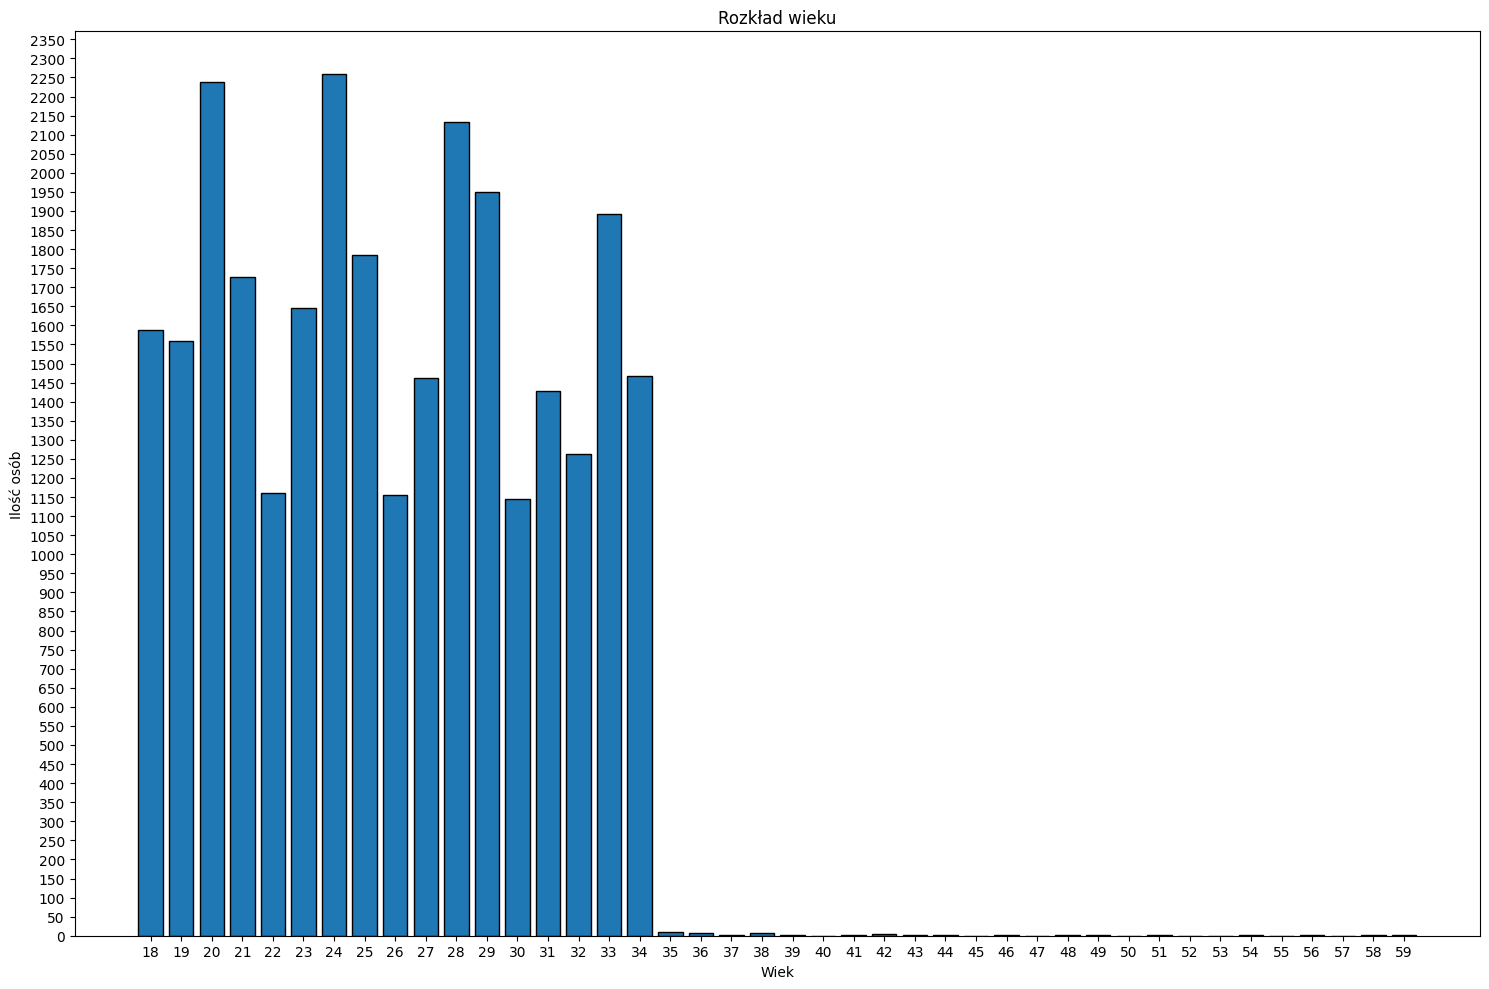

In [ ]:
def age_plot(df, min_age=18):
    ages = pd.to_numeric(df['Age'])
    ages = ages[ages >= min_age]

    bins = np.arange(int(ages.min()), int(ages.max()) + 2) - 0.5

    plt.figure(figsize=(15, 10))
    plt.hist(ages, bins=bins, rwidth=0.8, edgecolor="black")
    plt.locator_params(nbins=50)
    plt.xticks(np.arange(min_age, int(ages.max()) + 1))
    plt.xlabel('Wiek')
    plt.ylabel('Ilość osób')
    plt.title(f'Rozkład wieku')
    plt.tight_layout()
    plt.show()

age_plot(data)

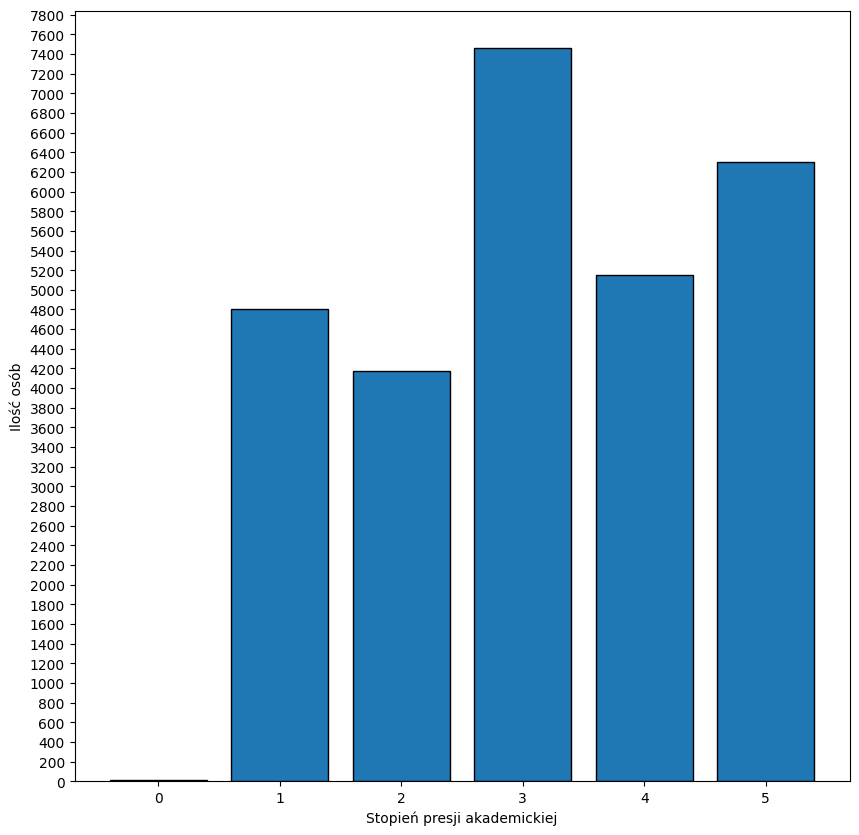

In [ ]:
def pressure_plot(data):
    plt.figure(figsize=(10,10))
    plt.hist(data['Academic Pressure'], bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5], rwidth=0.8, edgecolor="black")
    plt.ylabel('Ilość osób')
    plt.xlabel('Stopień presji akademickiej')
    plt.locator_params('x', nbins=10)
    plt.locator_params('y', nbins=50)
pressure_plot(data)

In [ ]:
data['Academic Pressure'].value_counts().sort_index()

Academic Pressure
0.0       9
1.0    4801
2.0    4178
3.0    7462
4.0    5155
5.0    6296
Name: count, dtype: int64

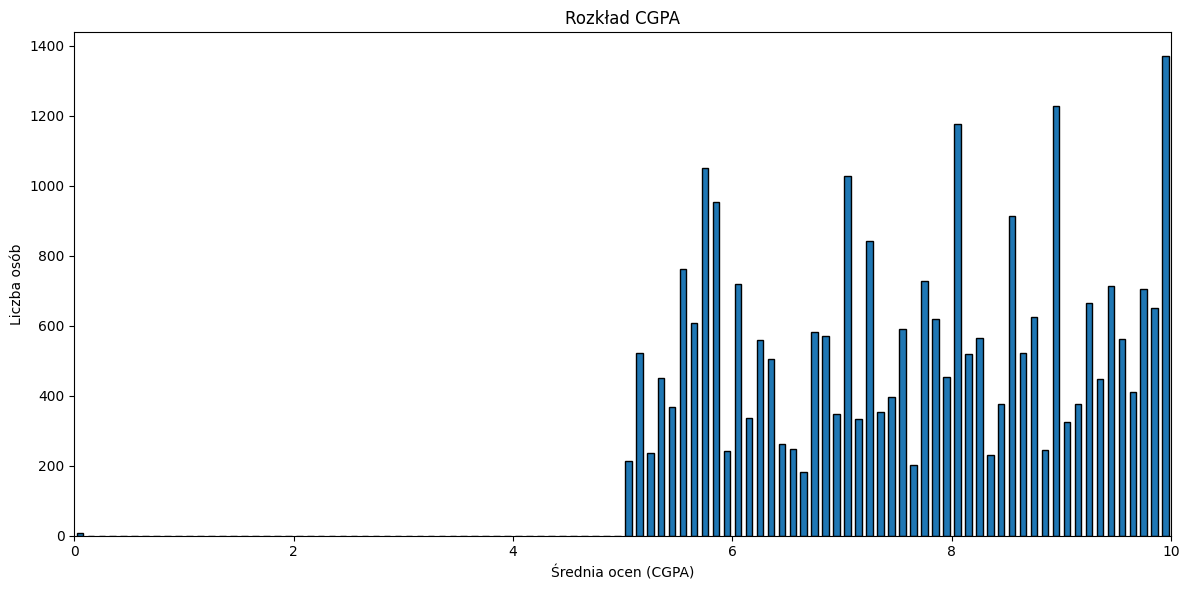

In [ ]:
def cgpa_plot(df, xmin=0.0, xmax=10.0, bin_width=0.1, show_removed=True):
    bins = np.arange(xmin, xmax + bin_width, bin_width)
    plt.figure(figsize=(12, 6))
    plt.hist(data["CGPA"], bins=bins, rwidth=0.6, edgecolor="black")
    plt.xlim(xmin, xmax)
    plt.xlabel("Średnia ocen (CGPA)")
    plt.ylabel("Liczba osób")
    plt.title("Rozkład CGPA")
    plt.tight_layout()
    plt.show()

cgpa_plot(data)

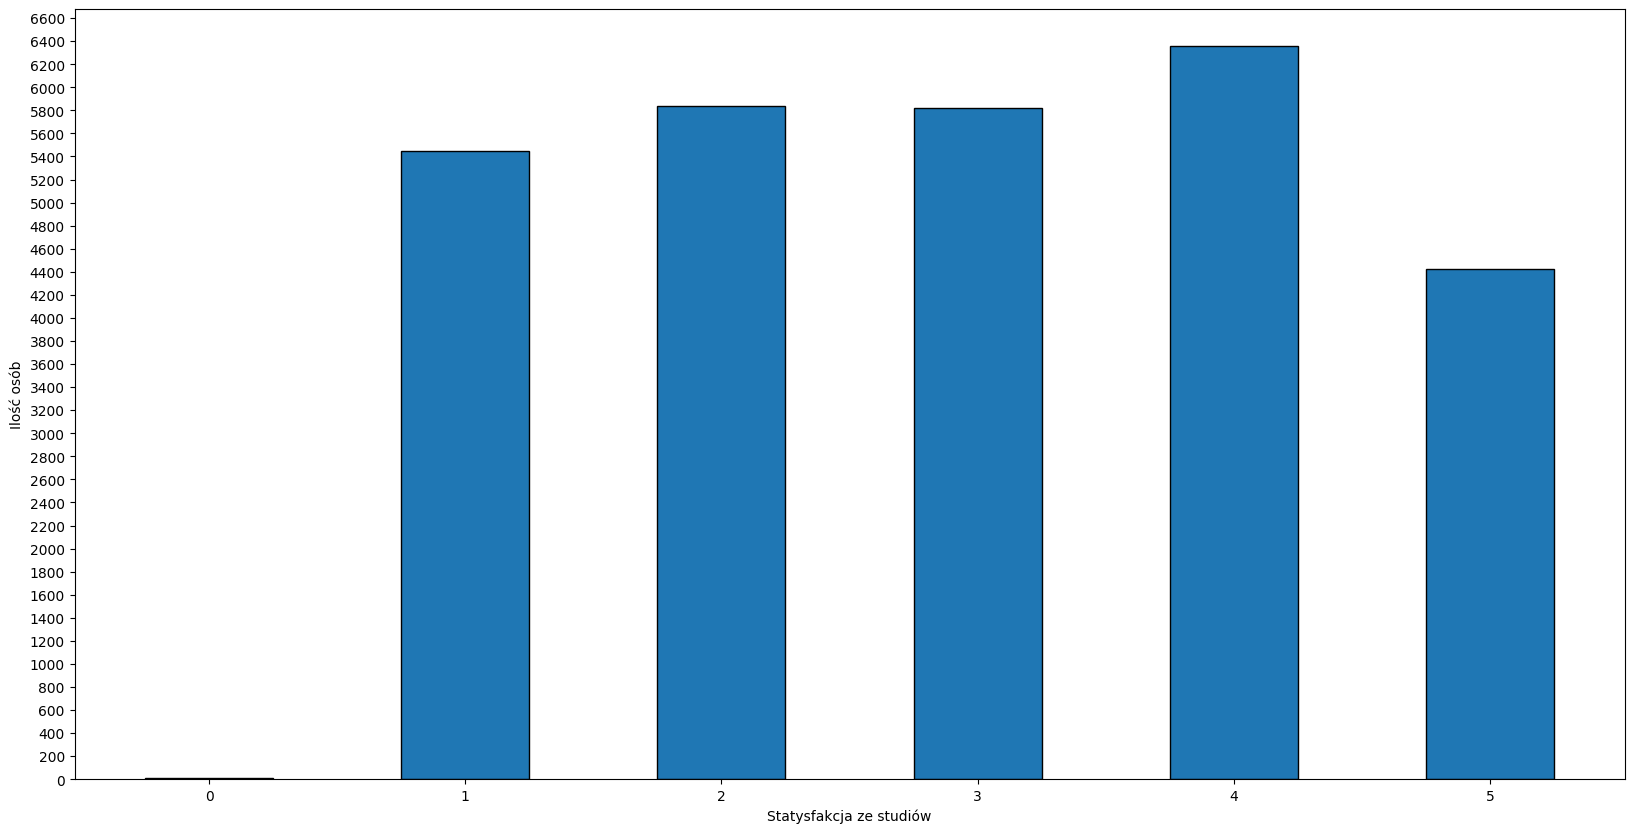

In [ ]:
def satis_plot(data):
    plt.figure(figsize=(20,10))
    plt.hist(data['Study Satisfaction'],  bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5], rwidth=0.5, edgecolor='black')
    plt.ylabel('Ilość osób')
    plt.xlabel('Statysfakcja ze studiów')
    plt.locator_params('x', nbins=10)
    plt.locator_params('y', nbins=50)

satis_plot(data)

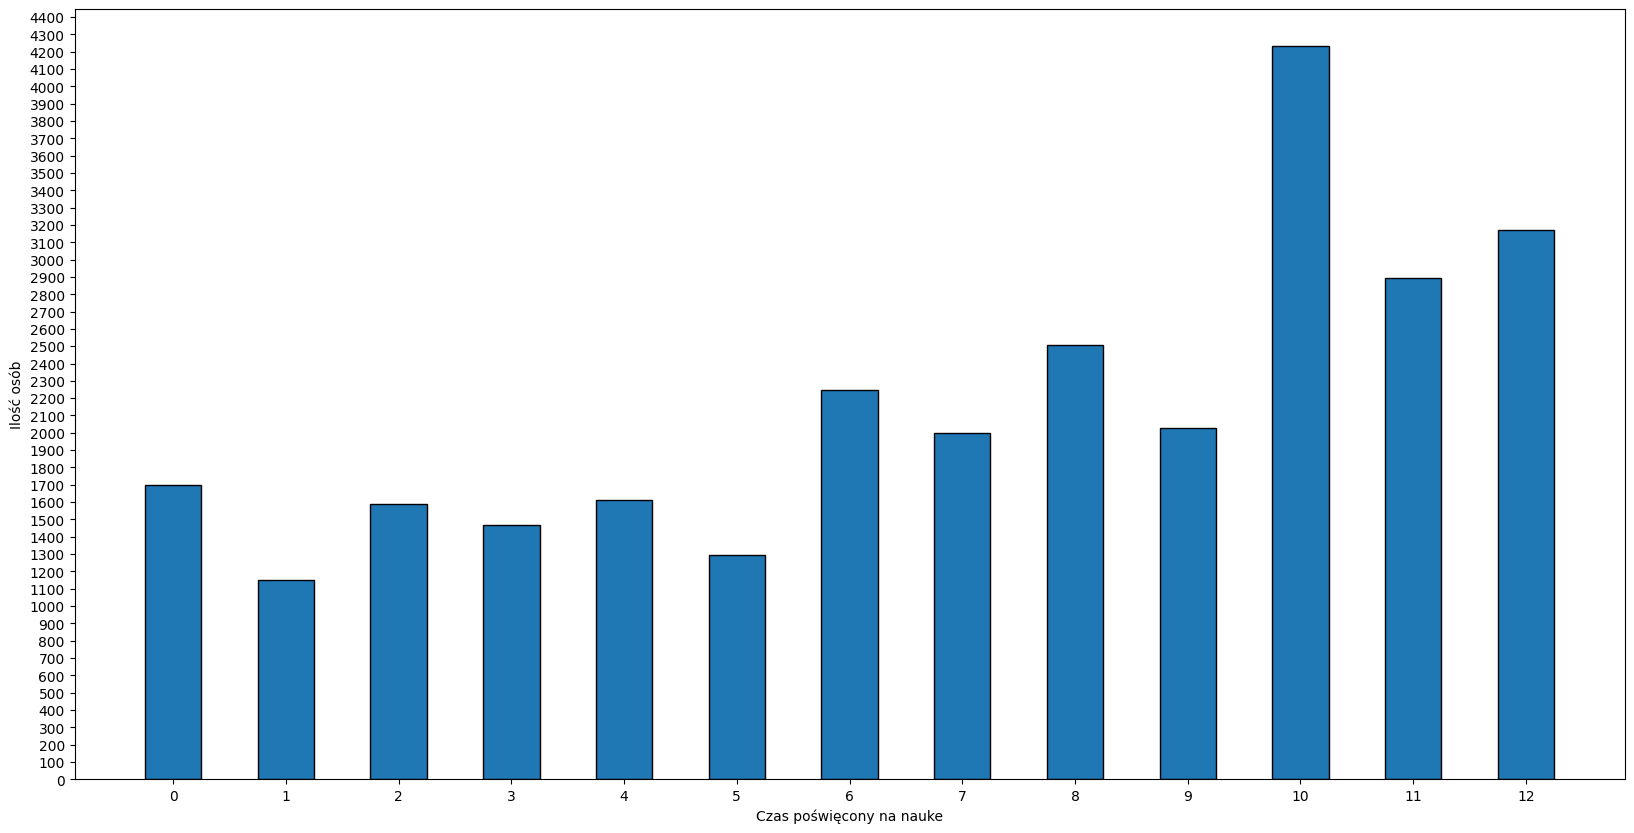

In [ ]:
def study_plot(data):
    plt.figure(figsize=(20,10))
    plt.hist(data['Work/Study Hours'], bins = np.arange(-0.5, 12.5 + 1, 1), rwidth=0.5, edgecolor='black')
    plt.ylabel('Ilość osób')
    plt.xlabel('Czas poświęcony na nauke')
    plt.locator_params('x', nbins=20)
    plt.locator_params('y', nbins=50)

study_plot(data)

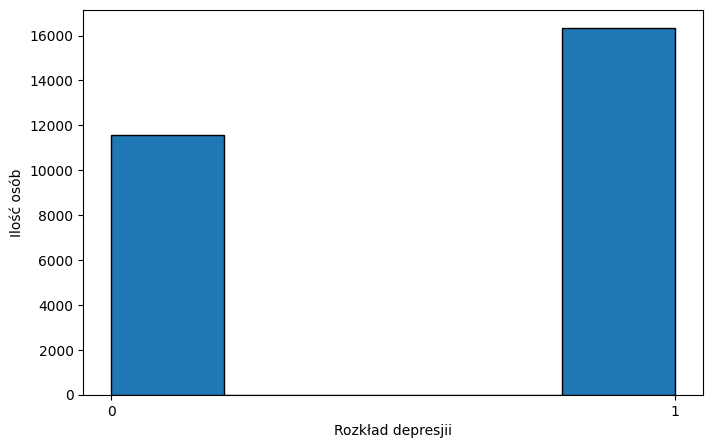

In [ ]:
def depression_plot(data):
    plt.figure(figsize=(8,5))
    plt.hist(data['Depression'], bins=5, edgecolor='black')
    plt.ylabel('Ilość osób')
    plt.xlabel('Rozkład depresji')
    plt.locator_params('x', nbins=1)
    plt.locator_params('y', nbins=10)
depression_plot(data)

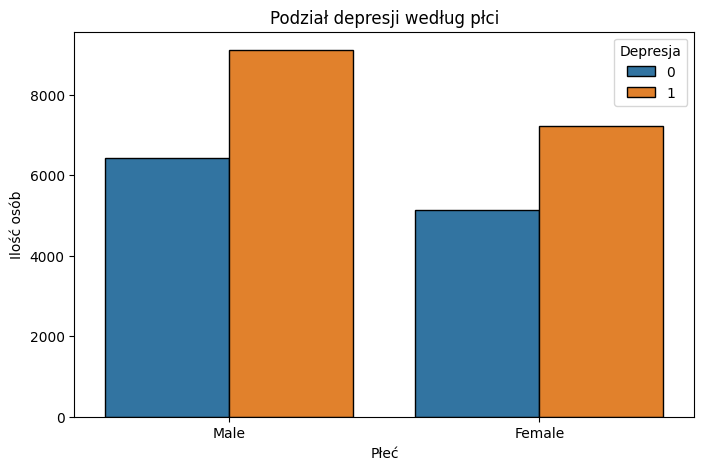

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', hue='Depression', data=data, edgecolor = 'black')
plt.title("Podział depresji według płci")
plt.xlabel("Płeć")
plt.ylabel("Ilość osób")
plt.legend(title="Depresja")
plt.show()

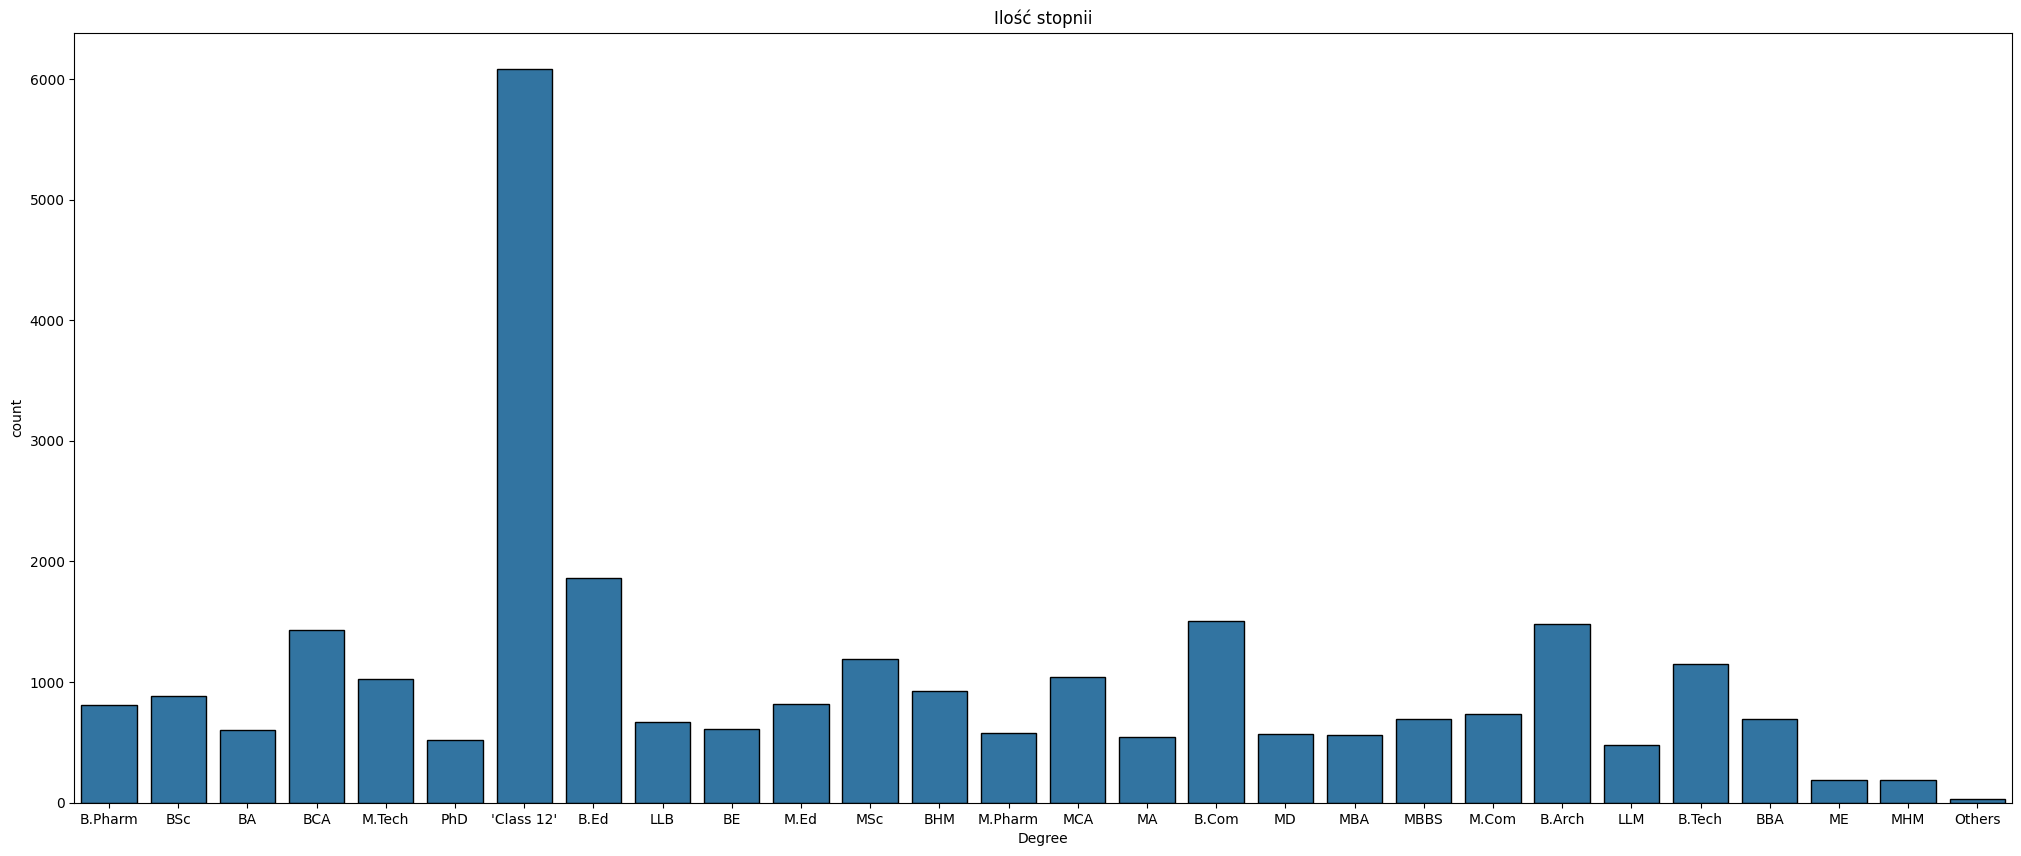

In [ ]:
def degree_plot(data):
    plt.figure(figsize=(25,10))
    sns.countplot(x='Degree', data=data, edgecolor = 'black')
    plt.title('Ilość stopnii')
    plt.show()
degree_plot(data)

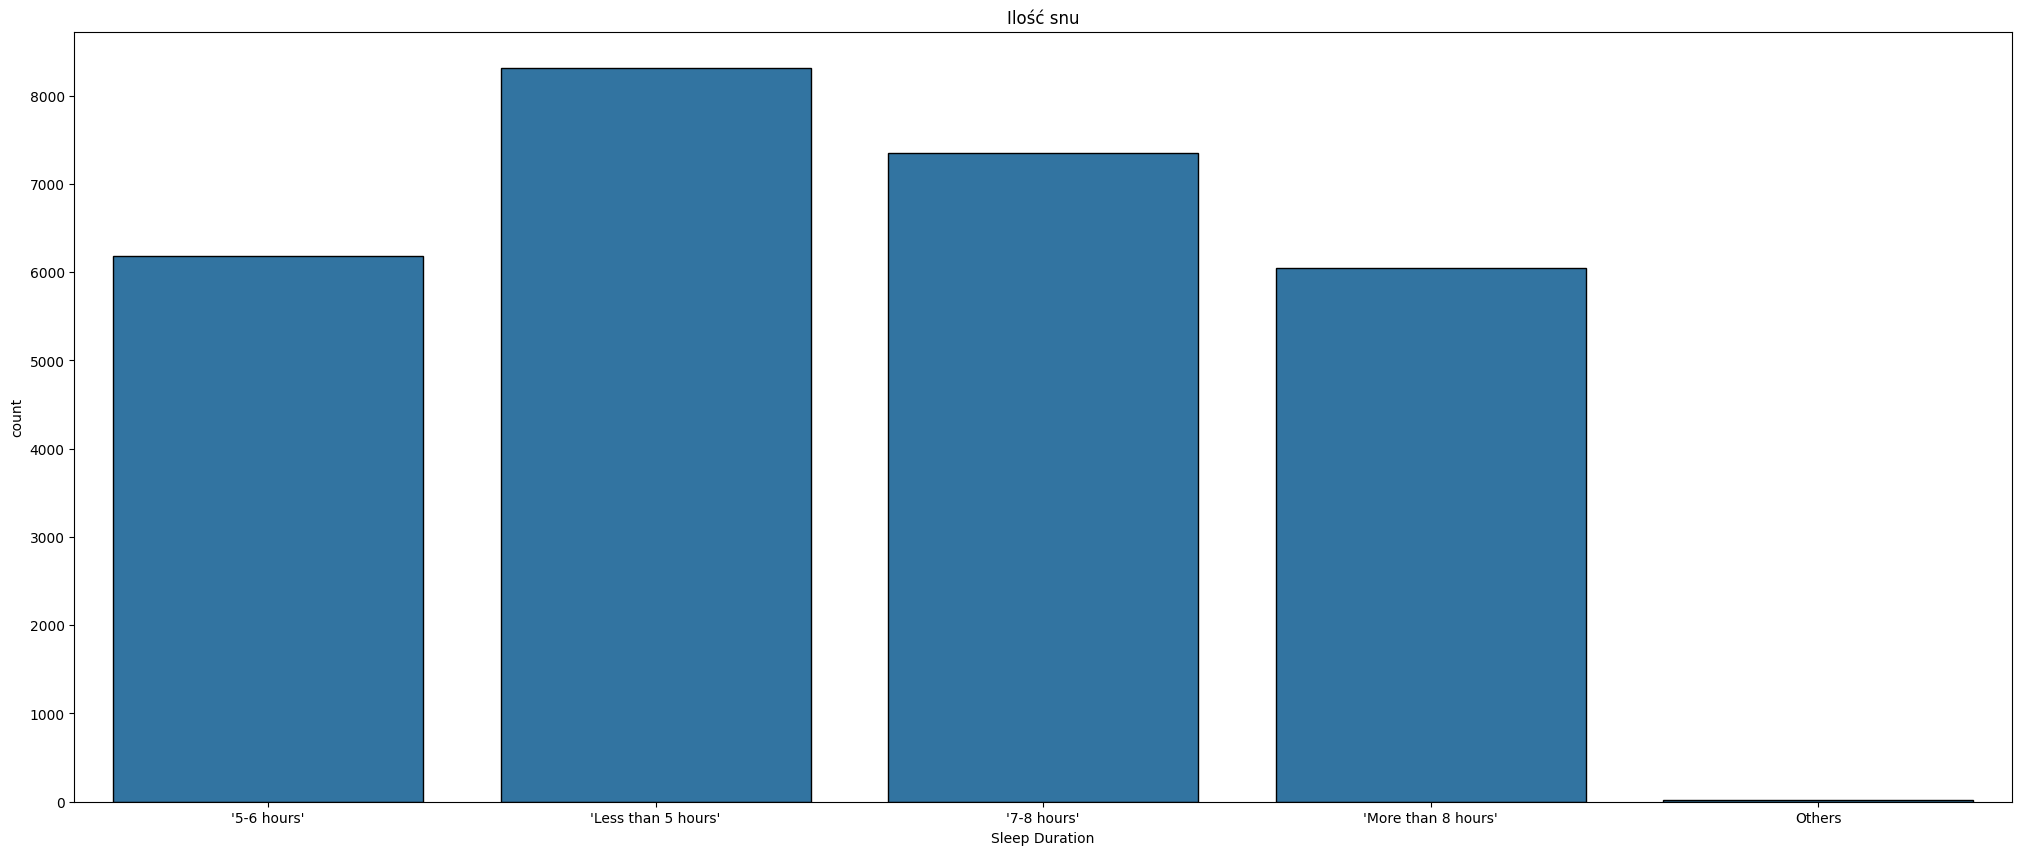

In [ ]:
def sleep_plot(data):
    plt.figure(figsize=(25,10))
    sns.countplot(x='Sleep Duration', data=data, edgecolor = 'black')
    plt.title('Ilość snu')
    plt.show()
sleep_plot(data)

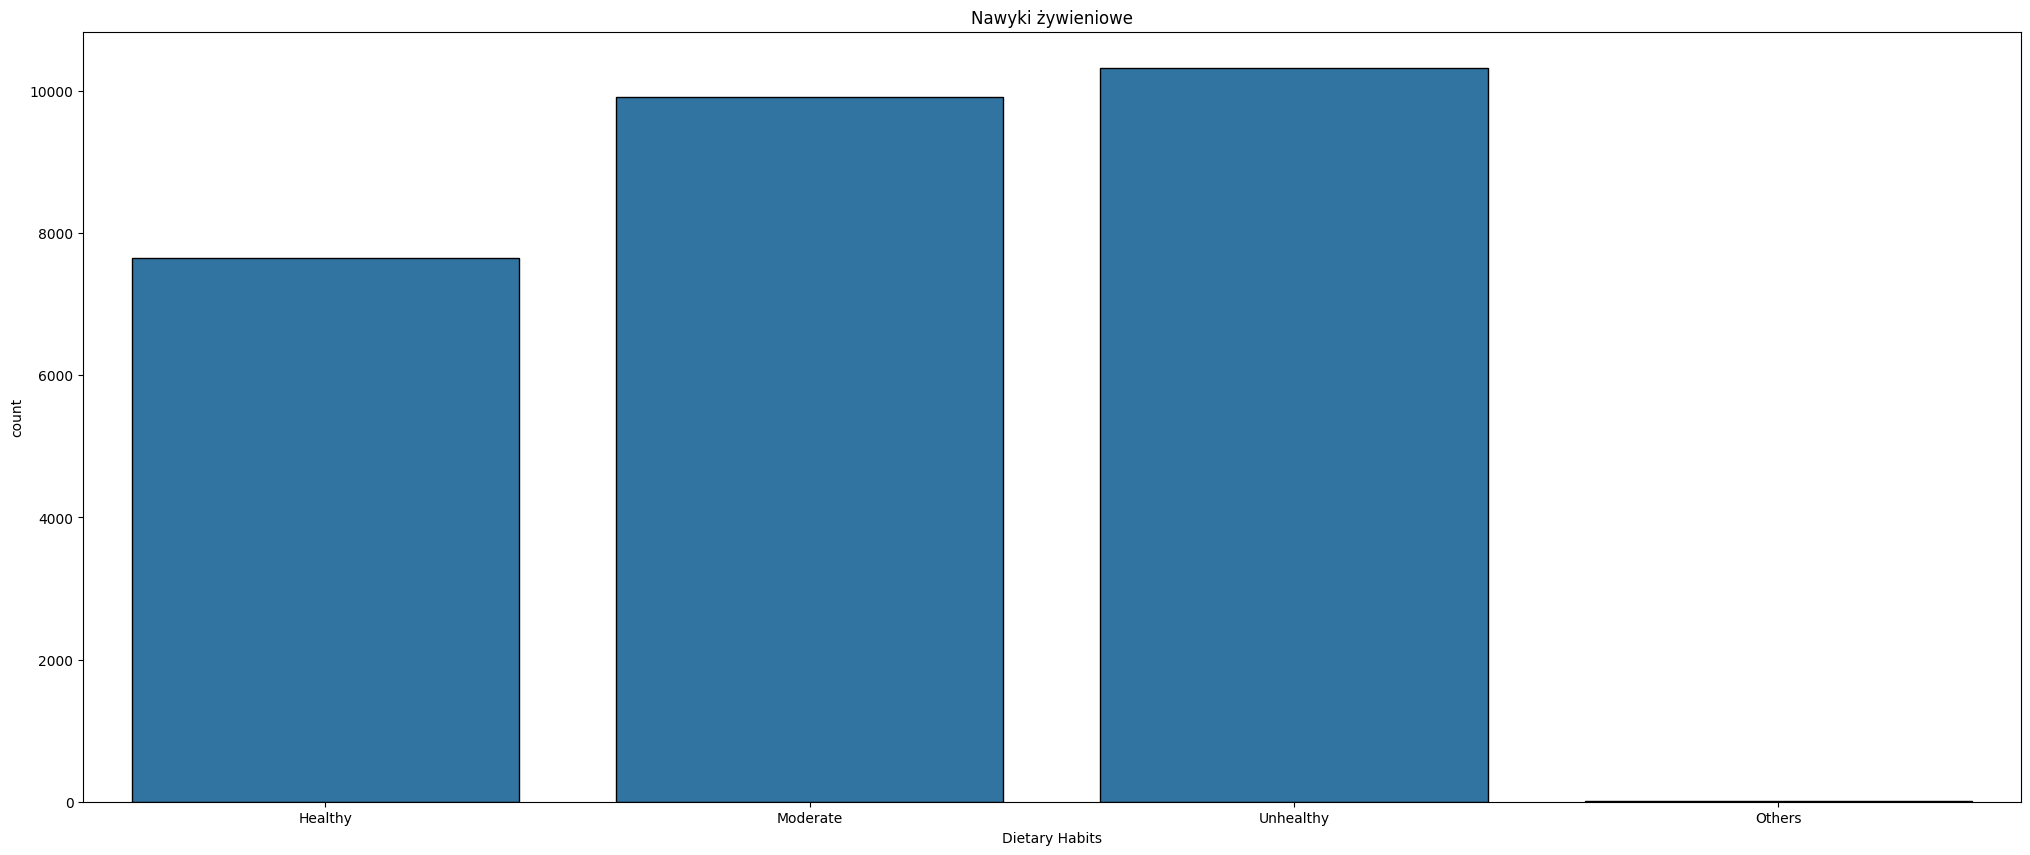

In [ ]:
def food_plot(data):
    plt.figure(figsize=(25,10))
    sns.countplot(x='Dietary Habits', data=data, edgecolor = 'black')
    plt.title('Nawyki żywieniowe')
    plt.show()
food_plot(data)

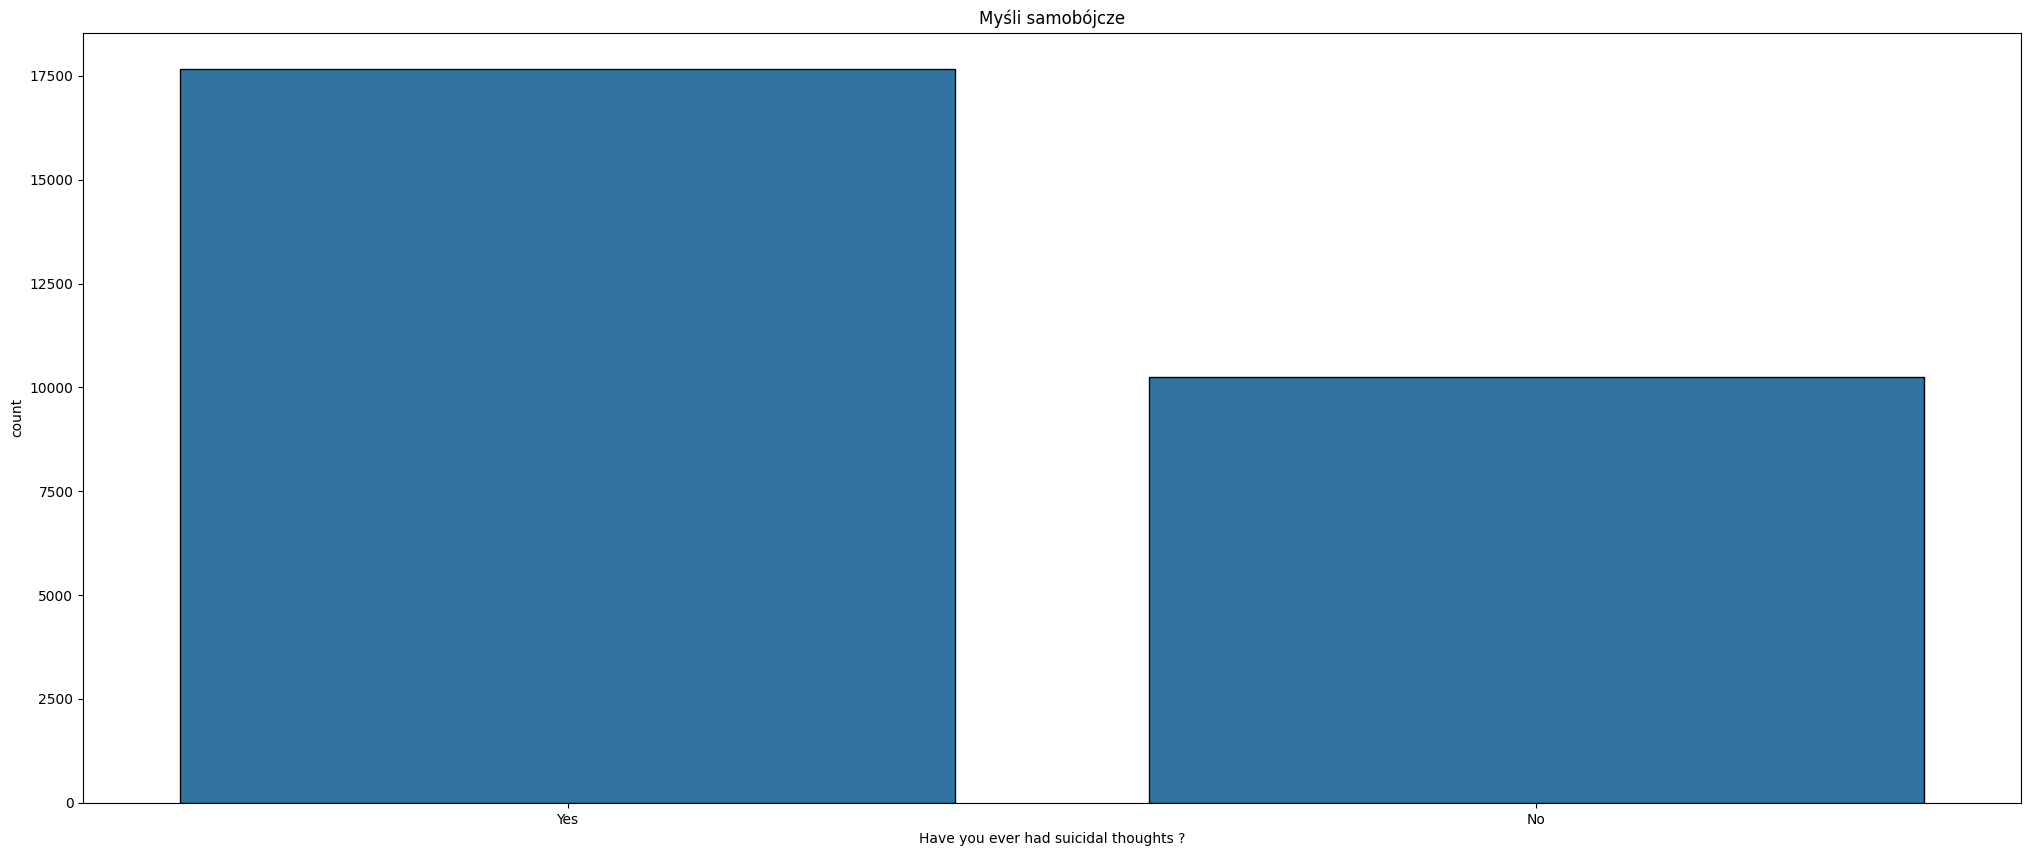

In [ ]:
def thoughts_plot(data):
    plt.figure(figsize=(25,10))
    sns.countplot(x='Have you ever had suicidal thoughts ?', data=data, edgecolor = 'black')
    plt.title('Myśli samobójcze')
    plt.show()
thoughts_plot(data)

<h2>Preprocessing

In [ ]:
new_data = data.drop(columns='City')
new_data = new_data[new_data['Profession'] == 'Student']
new_data = new_data.drop(columns=['Work Pressure', 'Profession', 'Job Satisfaction'])
new_data

Gender   Age  Academic Pressure  CGPA  Study Satisfaction  \
0        Male  33.0                5.0  8.97                 2.0   
1      Female  24.0                2.0  5.90                 5.0   
2        Male  31.0                3.0  7.03                 5.0   
3      Female  28.0                3.0  5.59                 2.0   
4      Female  25.0                4.0  8.13                 3.0   
...       ...   ...                ...   ...                 ...   
27896  Female  27.0                5.0  5.75                 5.0   
27897    Male  27.0                2.0  9.40                 3.0   
27898    Male  31.0                3.0  6.61                 4.0   
27899  Female  18.0                5.0  6.88                 2.0   
27900    Male  27.0                4.0  9.24                 1.0   

            Sleep Duration Dietary Habits      Degree  \
0              '5-6 hours'        Healthy     B.Pharm   
1              '5-6 hours'       Moderate         BSc   
2      'Less than 5 hours'        Healthy          BA   
3              '7-8 hours'       Moderate         BCA   
4              '5-6 hours'       Moderate      M.Tech   
...                    ...            ...         ...   
27896          '5-6 hours'      Unhealthy  'Class 12'   
27897  'Less than 5 hours'        Healthy         MSc   
27898          '5-6 hours'      Unhealthy          MD   
27899  'Less than 5 hours'        Healthy  'Class 12'   
27900  'Less than 5 hours'        Healthy         BCA   

      Have you ever had suicidal thoughts ?  Work/Study Hours  \
0                                       Yes               3.0   
1                                        No               3.0   
2                                        No               9.0   
3                                       Yes               4.0   
4                                       Yes               1.0   
...                                     ...               ...   
27896                                   Yes               7.0   
27897                                    No               0.0   
27898                                    No              12.0   
27899                                   Yes              10.0   
27900                                   Yes               2.0   

      Financial Stress Family History of Mental Illness  Depression  
0                  1.0                               No           1  
1                  2.0                              Yes           0  
2                  1.0                              Yes           0  
3                  5.0                              Yes           1  
4                  1.0                               No           0  
...                ...                              ...         ...  
27896              1.0                              Yes           0  
27897              3.0                              Yes           0  
27898              2.0                               No           0  
27899              5.0                               No           1  
27900              3.0                              Yes           1  

[27870 rows x 13 columns]

<h2>Tekst na liczby dla wartości binarnych

In [ ]:
label_encoder = LabelEncoder()
new_data['Gender_en'] = label_encoder.fit_transform(new_data['Gender'])
new_data['Suicidal_Thoughts_en'] = label_encoder.fit_transform(new_data['Have you ever had suicidal thoughts ?'])
new_data['Financial Stress_en'] = label_encoder.fit_transform(new_data['Financial Stress'])
new_data['Family_History_Mental_en'] = label_encoder.fit_transform(new_data['Family History of Mental Illness'])
new_data

Gender   Age  Academic Pressure  CGPA  Study Satisfaction  \
0        Male  33.0                5.0  8.97                 2.0   
1      Female  24.0                2.0  5.90                 5.0   
2        Male  31.0                3.0  7.03                 5.0   
3      Female  28.0                3.0  5.59                 2.0   
4      Female  25.0                4.0  8.13                 3.0   
...       ...   ...                ...   ...                 ...   
27896  Female  27.0                5.0  5.75                 5.0   
27897    Male  27.0                2.0  9.40                 3.0   
27898    Male  31.0                3.0  6.61                 4.0   
27899  Female  18.0                5.0  6.88                 2.0   
27900    Male  27.0                4.0  9.24                 1.0   

            Sleep Duration Dietary Habits      Degree  \
0              '5-6 hours'        Healthy     B.Pharm   
1              '5-6 hours'       Moderate         BSc   
2      'Less than 5 hours'        Healthy          BA   
3              '7-8 hours'       Moderate         BCA   
4              '5-6 hours'       Moderate      M.Tech   
...                    ...            ...         ...   
27896          '5-6 hours'      Unhealthy  'Class 12'   
27897  'Less than 5 hours'        Healthy         MSc   
27898          '5-6 hours'      Unhealthy          MD   
27899  'Less than 5 hours'        Healthy  'Class 12'   
27900  'Less than 5 hours'        Healthy         BCA   

      Have you ever had suicidal thoughts ?  Work/Study Hours  \
0                                       Yes               3.0   
1                                        No               3.0   
2                                        No               9.0   
3                                       Yes               4.0   
4                                       Yes               1.0   
...                                     ...               ...   
27896                                   Yes               7.0   
27897                                    No               0.0   
27898                                    No              12.0   
27899                                   Yes              10.0   
27900                                   Yes               2.0   

      Financial Stress Family History of Mental Illness  Depression  \
0                  1.0                               No           1   
1                  2.0                              Yes           0   
2                  1.0                              Yes           0   
3                  5.0                              Yes           1   
4                  1.0                               No           0   
...                ...                              ...         ...   
27896              1.0                              Yes           0   
27897              3.0                              Yes           0   
27898              2.0                               No           0   
27899              5.0                               No           1   
27900              3.0                              Yes           1   

       Gender_en  Suicidal_Thoughts_en  Financial Stress_en  \
0              1                     1                    0   
1              0                     0                    1   
2              1                     0                    0   
3              0                     1                    4   
4              0                     1                    0   
...          ...                   ...                  ...   
27896          0                     1                    0   
27897          1                     0                    2   
27898          1                     0                    1   
27899          0                     1                    4   
27900          1                     1                    2   

       Family_History_Mental_en  
0                             0  
1                             1  
2           

<h2>OneHotEncoding dla reszty

In [ ]:
sleep_dummies = pd.get_dummies(new_data['Sleep Duration'], prefix='sleep', dtype='int')
dietary_dummies = pd.get_dummies(new_data['Dietary Habits'], prefix='dietary', dtype='int')
degree_dummies = pd.get_dummies(new_data['Degree'], prefix='degree', dtype='int')
new_data = pd.concat([new_data, sleep_dummies, dietary_dummies, degree_dummies], axis=1)

new_data

Gender   Age  Academic Pressure  CGPA  Study Satisfaction  \
0        Male  33.0                5.0  8.97                 2.0   
1      Female  24.0                2.0  5.90                 5.0   
2        Male  31.0                3.0  7.03                 5.0   
3      Female  28.0                3.0  5.59                 2.0   
4      Female  25.0                4.0  8.13                 3.0   
...       ...   ...                ...   ...                 ...   
27896  Female  27.0                5.0  5.75                 5.0   
27897    Male  27.0                2.0  9.40                 3.0   
27898    Male  31.0                3.0  6.61                 4.0   
27899  Female  18.0                5.0  6.88                 2.0   
27900    Male  27.0                4.0  9.24                 1.0   

            Sleep Duration Dietary Habits      Degree  \
0              '5-6 hours'        Healthy     B.Pharm   
1              '5-6 hours'       Moderate         BSc   
2      'Less than 5 hours'        Healthy          BA   
3              '7-8 hours'       Moderate         BCA   
4              '5-6 hours'       Moderate      M.Tech   
...                    ...            ...         ...   
27896          '5-6 hours'      Unhealthy  'Class 12'   
27897  'Less than 5 hours'        Healthy         MSc   
27898          '5-6 hours'      Unhealthy          MD   
27899  'Less than 5 hours'        Healthy  'Class 12'   
27900  'Less than 5 hours'        Healthy         BCA   

      Have you ever had suicidal thoughts ?  Work/Study Hours  ... degree_MA  \
0                                       Yes               3.0  ...         0   
1                                        No               3.0  ...         0   
2                                        No               9.0  ...         0   
3                                       Yes               4.0  ...         0   
4                                       Yes               1.0  ...         0   
...                                     ...               ...  ...       ...   
27896                                   Yes               7.0  ...         0   
27897                                    No               0.0  ...         0   
27898                                    No              12.0  ...         0   
27899                                   Yes              10.0  ...         0   
27900                                   Yes               2.0  ...         0   

      degree_MBA  degree_MBBS  degree_MCA  degree_MD  degree_ME  degree_MHM  \
0              0            0           0          0          0           0   
1              0            0           0          0          0           0   
2              0            0           0          0          0           0   
3              0            0           0          0          0           0   
4              0            0           0          0          0           0   
...          ...          ...         ...        ...        ...         ...   
27896          0            0           0          0          0           0   
27897          0            0           0          0          0           0   
27898          0            0           0          1          0           0   
27899          0            0           0          0          0           0   
27900          0            0           0          0          0           0   

       degree_MSc  degree_Others  degree_PhD  
0               0              0           0  
1               0              0           0  
2               0              0           0  
3               0              0           0  
4               0              0           0  
...           ...            ...         ...  
27896           0              0           0  
27897           1              0           0  
27898           0              0           0  
27899           0              0           0  
27900           0              0           0  

[27870 rows x 54 columns]

In [ ]:
new_data = new_data[new_data['degree_Others'] == 0]
new_data = new_data[new_data['sleep_Others'] == 0]
new_data = new_data[new_data['dietary_Others'] == 0]
new_data.drop(columns=['degree_Others','sleep_Others','dietary_Others'], inplace=True)


<h2>IQR do outlinerów

In [ ]:
def filter(data, cols):
  for col in cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
  return data

In [ ]:
cols = ['Age', 'CGPA']

new_data = filter(new_data, cols)

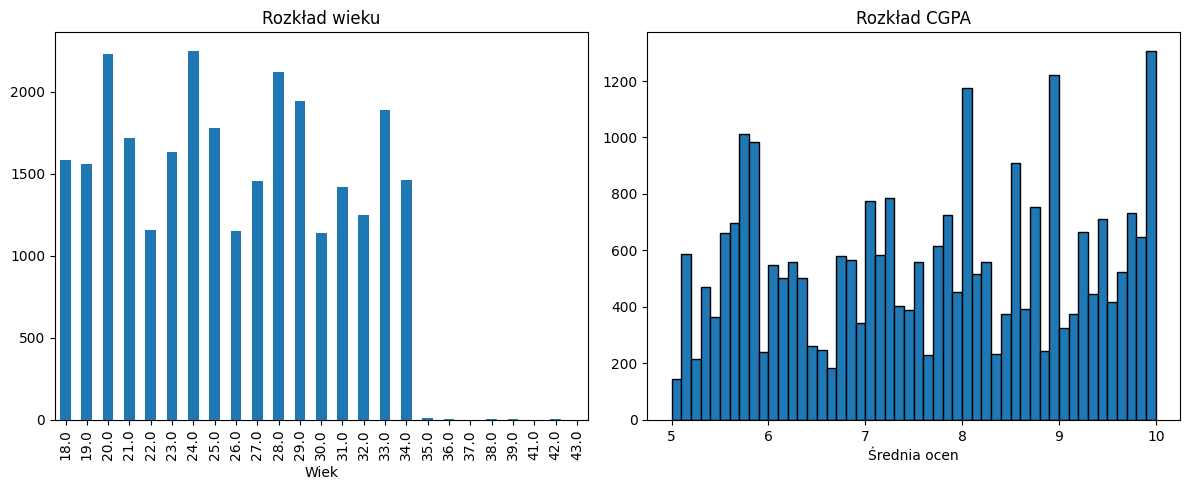

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

new_data.groupby('Age').size().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Wiek')
axes[0].set_title('Rozkład wieku')

bins = np.arange(np.floor(new_data['CGPA'].min()),
                 np.ceil(new_data['CGPA'].max()) + 0.1,
                 0.1)

axes[1].hist(new_data['CGPA'], bins=bins, edgecolor='black')
axes[1].set_xlabel('Średnia ocen')
axes[1].set_title('Rozkład CGPA')

plt.tight_layout()
plt.show()

<h2>Podział danych

In [ ]:
target = new_data['Depression']
process_data = new_data.drop(columns=[
    'Gender', 'Have you ever had suicidal thoughts ?',
    'Financial Stress', 'Family History of Mental Illness',
    'Sleep Duration', 'Dietary Habits', 'Degree', 'Depression'
])


labels = process_data.columns

X, y = process_data, target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, y_train

(        Age  Academic Pressure  CGPA  Study Satisfaction  Work/Study Hours  \
 13446  22.0                3.0  6.29                 1.0               2.0   
 27837  28.0                3.0  7.28                 4.0              11.0   
 14215  30.0                3.0  8.29                 1.0               5.0   
 24338  28.0                1.0  7.22                 1.0               2.0   
 11801  28.0                3.0  7.83                 5.0              11.0   
 ...     ...                ...   ...                 ...               ...   
 4849   33.0                1.0  5.97                 3.0               8.0   
 25454  24.0                5.0  7.53                 5.0               8.0   
 20728  24.0                5.0  5.74                 2.0               7.0   
 24926  20.0                5.0  8.70                 1.0               7.0   
 18559  23.0                2.0  9.93                 5.0               6.0   
 
        Gender_en  Suicidal_Thoughts_en  Financial

<h2>Standaryzacja

In [ ]:
standard = StandardScaler()

X_train_process = standard.fit_transform(X_train)
X_test_process = standard.transform(X_test)

X_train_process, X_test_process

(array([[-0.78075909, -0.10550002, -0.93499694, ..., -0.08242816,
         -0.21141961, -0.14028793],
        [ 0.44692527, -0.10550002, -0.25879556, ..., -0.08242816,
         -0.21141961, -0.14028793],
        [ 0.85615339, -0.10550002,  0.43106646, ..., -0.08242816,
         -0.21141961, -0.14028793],
        ...,
        [-0.37153097,  1.34423662, -1.31066438, ..., -0.08242816,
         -0.21141961, -0.14028793],
        [-1.1899872 ,  1.34423662,  0.71110946, ..., -0.08242816,
         -0.21141961, -0.14028793],
        [-0.57614503, -0.83036835,  1.55123845, ..., -0.08242816,
         -0.21141961, -0.14028793]]),
 array([[ 1.46999556, -1.55523667,  0.11687188, ..., -0.08242816,
         -0.21141961, -0.14028793],
        [-1.59921532,  1.34423662, -1.02379106, ..., -0.08242816,
         -0.21141961, -0.14028793],
        [-1.1899872 , -0.83036835,  0.57450312, ..., -0.08242816,
         -0.21141961, -0.14028793],
        ...,
        [-1.59921532, -0.10550002,  0.11687188, ..., -

<h2>Balansowanie danych

In [ ]:
y_train.value_counts()

Depression
1    13011
0     9216
Name: count, dtype: int64

**Klasa depresja stanowi około 58%**

In [ ]:
sampler = RandomUnderSampler(random_state=42)

X_train_bal, y_train_bal = sampler.fit_resample(X_train_process, y_train)

y_train_bal.value_counts()

Depression
0    9216
1    9216
Name: count, dtype: int64

**Odcinamy nadwyżkę aby model nauczył się odróżniać obie klasy**

<h2>OverSampling

In [ ]:
samplerv2 = SMOTE(random_state=42)

X_train_sm, y_train_sm = samplerv2.fit_resample(X_train_process, y_train)

y_train_sm.value_counts()

Depression
1    13011
0    13011
Name: count, dtype: int64

# Redukcja wymiarowości

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_process)
X_test_pca = pca.transform(X_test_process)

print("Kształt oryginalny treningowy: {}".format(str(X_train_process.shape)))
print("Kształt zredukowany treningowy: {}".format(str(X_train_pca.shape)))

print("Kształt oryginalny testowy: {}".format(str(X_test_process.shape)))
print("Kształt zredukowany testowy: {}".format(str(X_test_pca.shape)))

Kształt oryginalny treningowy: (22227, 43)
Kształt zredukowany treningowy: (22227, 2)
Kształt oryginalny testowy: (5557, 43)
Kształt zredukowany testowy: (5557, 2)


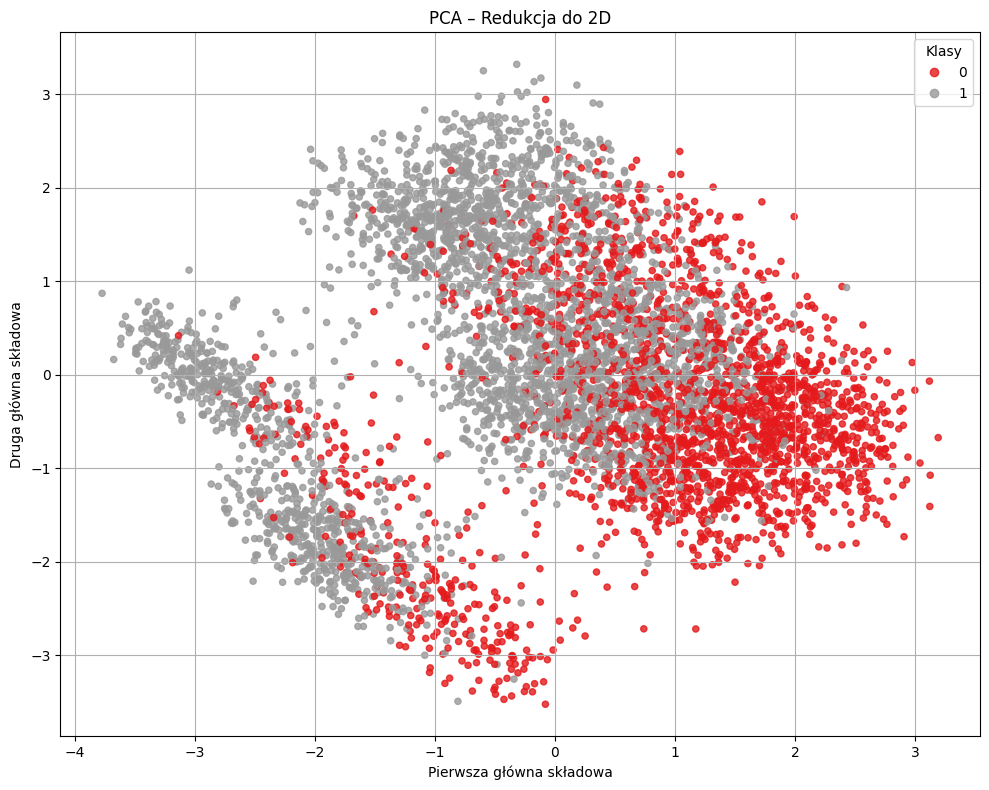

In [ ]:
def mainPlot():
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], alpha=0.8, s=20, cmap='Set1', c=y_test)
    plt.xlabel("Pierwsza główna składowa")
    plt.ylabel("Druga główna składowa")
    plt.title('PCA – Redukcja do 2D')
    plt.grid(True)

    classes = np.unique(y_test)
    legend_labels = classes.tolist()

    plt.legend(
        handles=scatter.legend_elements()[0],
        labels=legend_labels,
        title="Klasy"
    )

    plt.tight_layout()
    plt.show()

mainPlot()

Text(0, 0.5, 'Komponenty główne')

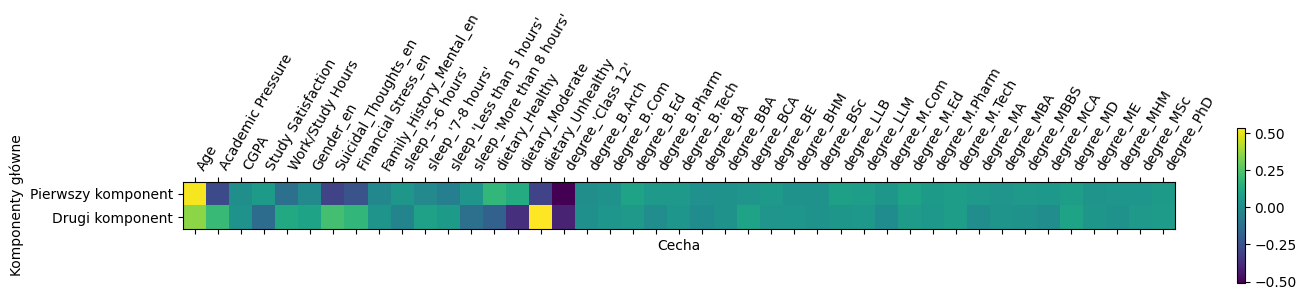

In [ ]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["Pierwszy komponent", "Drugi komponent"])
plt.colorbar()
plt.xticks(range(len(labels)),
labels, rotation=60, ha='left')
plt.xlabel("Cecha")
plt.ylabel("Komponenty główne")

In [ ]:
print("\nWyjaśniona wariancja:", pca.explained_variance_ratio_, ' = ' , (pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1])*100,'%')


Wyjaśniona wariancja: [0.04660743 0.03762538]  =  8.423280996652165 %


# Porównanie modeli

In [ ]:
def matrix(y_pred_log_reg):
  cm = confusion_matrix(y_test, y_pred_log_reg)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap=plt.cm.Blues)
  plt.title("Confusion Matrix")
  plt.show()


SVM - maszyny wektorów nośnych

In [ ]:
def SVM(X_train_process, X_test_process, y_train, y_test):
  svm = SVC(kernel='linear', probability=True, random_state=42)
  svm.fit(X_train_process, y_train)
  y_pred_svm = svm.predict(X_test_process)
  print(classification_report(y_test, y_pred_svm))
  matrix(y_pred_svm)
  return svm

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      2304
           1       0.86      0.88      0.87      3253

    accuracy                           0.85      5557
   macro avg       0.84      0.84      0.84      5557
weighted avg       0.85      0.85      0.85      5557



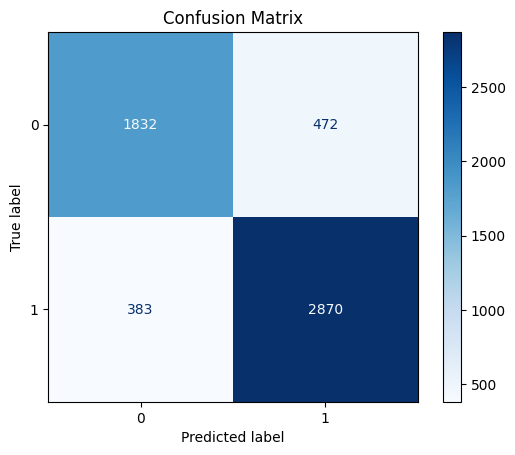

In [ ]:
svm = SVM(X_train_process, X_test_process, y_train, y_test)

prezentacja danych

In [ ]:
def showModel(model):
    X_test_pca_plot = X_test_pca
    y_test_pred = model.predict(X_test_process)

    x_min, x_max = X_test_pca_plot[:, 0].min() - 1, X_test_pca_plot[:, 0].max() + 1
    y_min, y_max = X_test_pca_plot[:, 1].min() - 1, X_test_pca_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
    classes = np.unique(y_test)
    legend_labels = classes.tolist()

    scatter1 = ax1.scatter(X_test_pca_plot[:, 0], X_test_pca_plot[:, 1], c=y_test_pred, alpha=0.8, s=20, cmap='Set1')

    ax1.set_title("Model (Test Set Predictions)")
    ax1.set_xlabel("PCA 1")
    ax1.set_ylabel("PCA 2")
    ax1.legend(
        handles=scatter1.legend_elements()[0],
        labels=legend_labels,
        title="Klasy"
    )
    ax1.grid(True)
    scatter2 = ax2.scatter(X_test_pca[:, 0], X_test_pca[:, 1], alpha=0.8, s=20, cmap='Set1', c=y_test)
    ax2.set_xlabel("Pierwsza główna składowa")
    ax2.set_ylabel("Druga główna składowa")
    ax2.set_title('PCA – Redukcja do 2D')
    ax2.legend(
        handles=scatter2.legend_elements()[0],
        labels=legend_labels,
        title="Klasy"
    )
    ax2.grid(True)
    plt.tight_layout()
    plt.show()

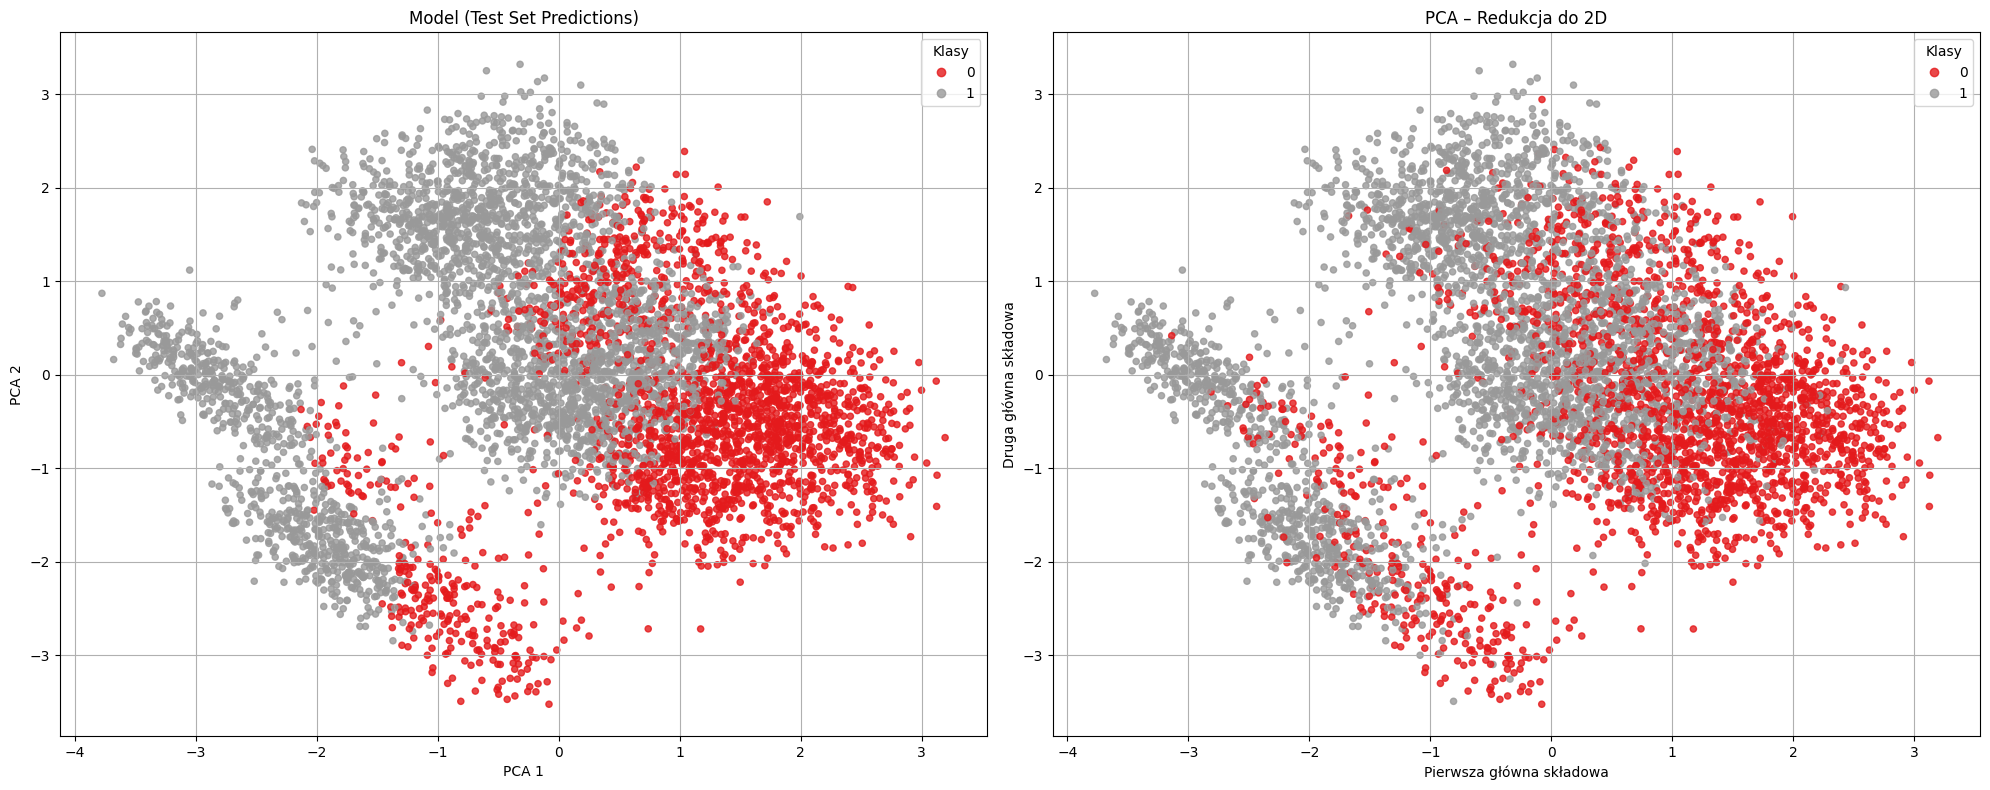

In [ ]:
showModel(svm)

# Regresja logistyczna

trenowanie modelu

In [ ]:
def LogReg(X_train_process, X_test_process, y_train, y_test):
  log_reg_model = LogisticRegression(max_iter=100, random_state=42)
  log_reg_model.fit(X_train_process, y_train)
  y_pred_log_reg = log_reg_model.predict(X_test_process)
  print(classification_report(y_test, y_pred_log_reg))
  matrix(y_pred_log_reg)
  return log_reg_model

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      2304
           1       0.86      0.88      0.87      3253

    accuracy                           0.85      5557
   macro avg       0.85      0.84      0.84      5557
weighted avg       0.85      0.85      0.85      5557



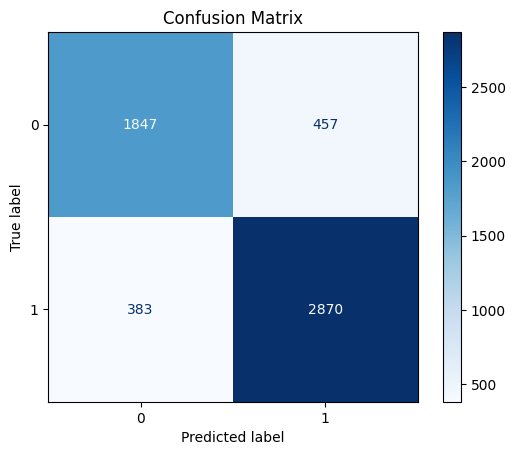

In [ ]:
log_reg_model = LogReg(X_train_process, X_test_process, y_train, y_test)

prezentacja danych

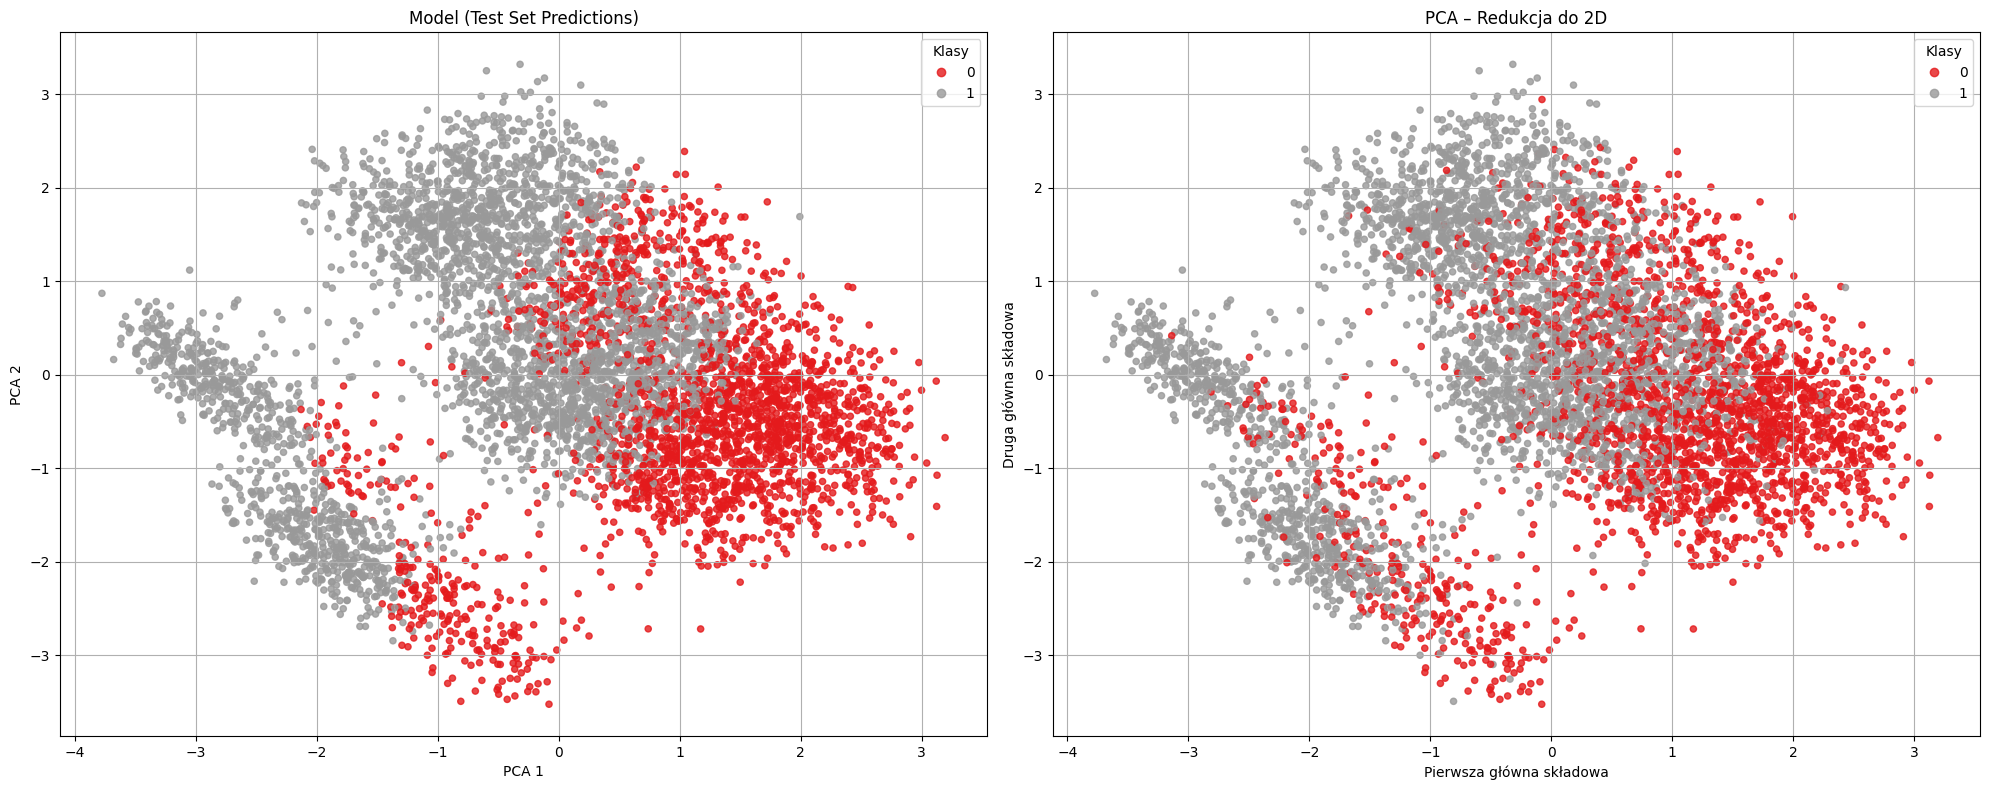

In [ ]:
showModel(log_reg_model)

# KNN

trenowanie modelu

In [ ]:
def KNN(X_train_process, X_test_process, y_train, y_test):
  hist = []
  best_model = 0
  best_score = 0
  best_pred = 0
  for k in range(5, 105, 10):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_process, y_train)
    y_pred_knn = knn_model.predict(X_test_process)
    score = accuracy_score(y_test, y_pred_knn)
    hist.append(score)
    if score > best_score:
      best_score = score
      best_model = knn_model
      best_pred = y_pred_knn
  plt.plot(range(5, 105, 10), hist)
  plt.title('Accuracy score w zależności od liczby sąsiadów')
  plt.xlabel("Liczba sąsiadów")
  plt.ylabel("Score")
  print(classification_report(y_test, best_pred))
  matrix(best_pred)
  return best_model

              precision    recall  f1-score   support

           0       0.87      0.66      0.75      2304
           1       0.80      0.93      0.86      3253

    accuracy                           0.82      5557
   macro avg       0.83      0.80      0.80      5557
weighted avg       0.83      0.82      0.81      5557



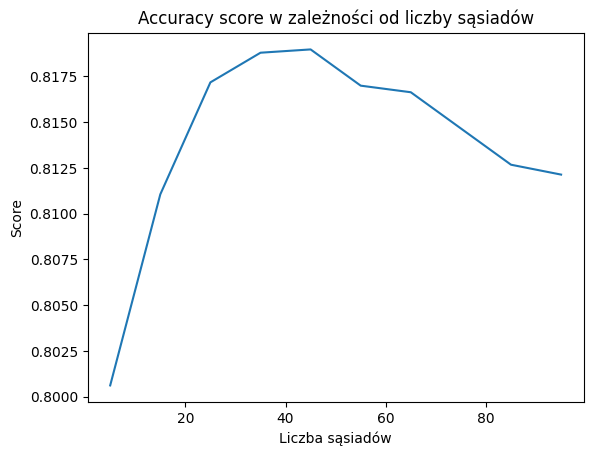

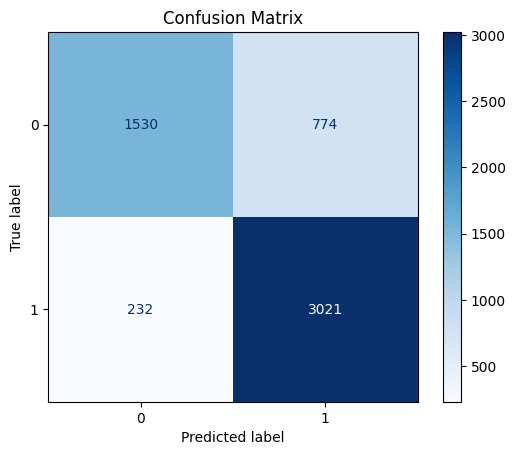

In [ ]:
knn_model = KNN(X_train_process, X_test_process, y_train, y_test)

prezentacja danych

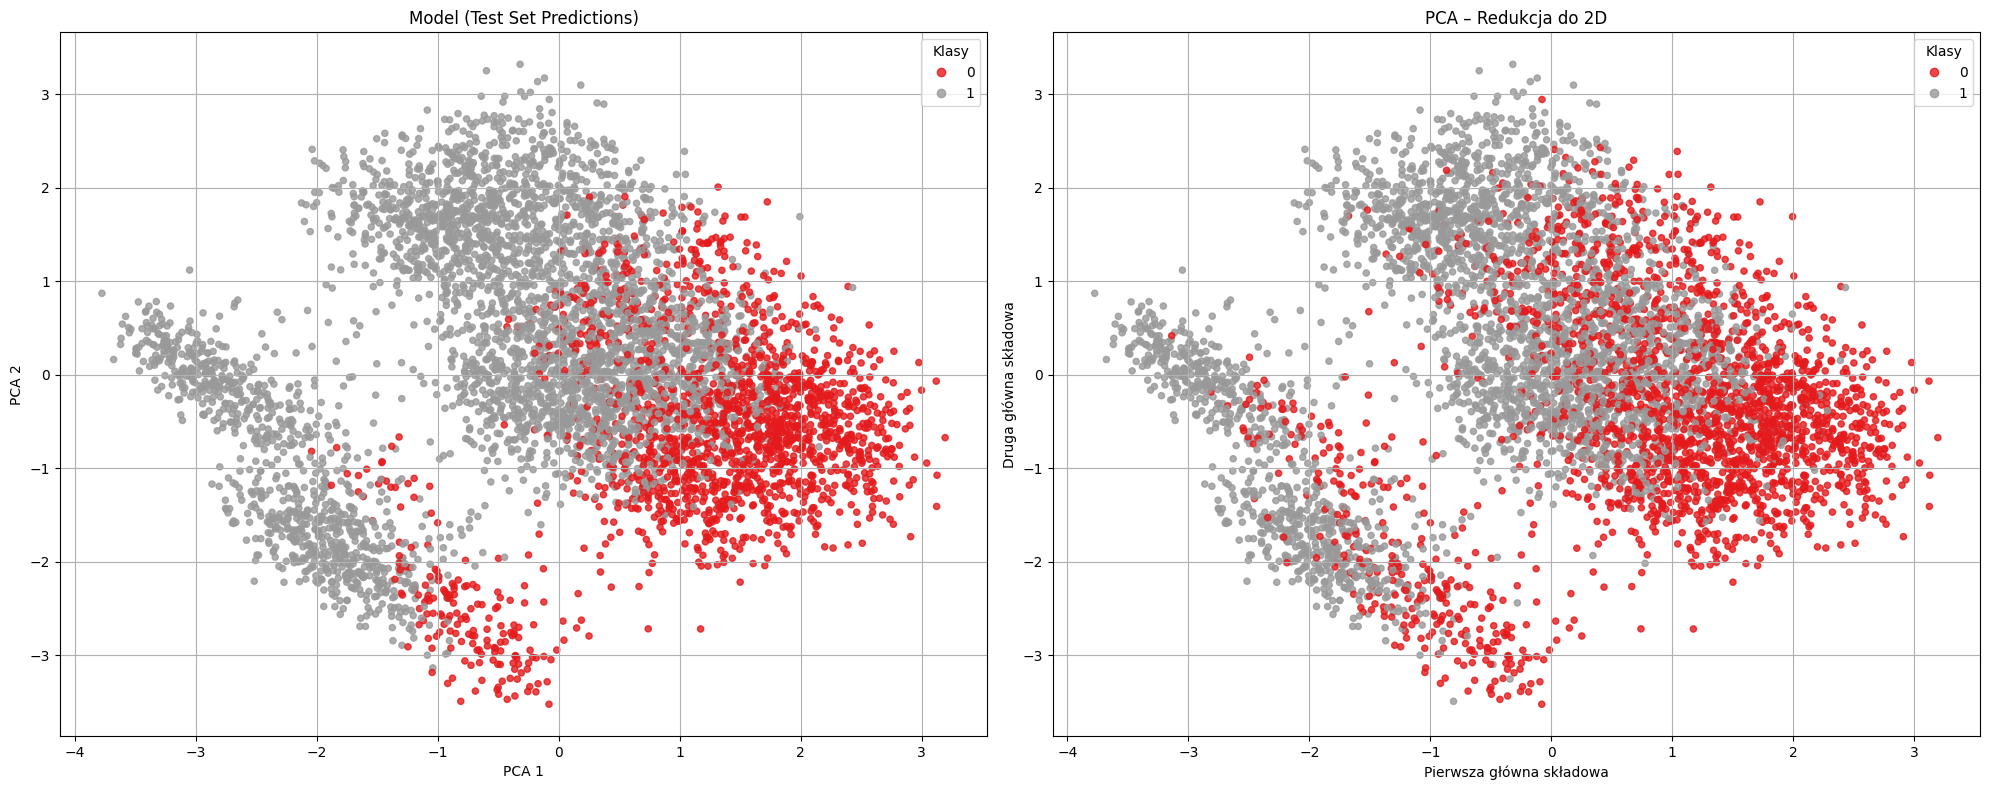

In [ ]:
showModel(knn_model)

# Random Forest Classifier

trenowanie modelu

In [ ]:
def RandomForest(X_train, X_test, y_train, y_test):
  hist = []
  best_model = 0
  best_score = 0
  best_pred = 0
  for k in range(80, 120, 5):
    forest = RandomForestClassifier(n_estimators=k, random_state=42)
    forest.fit(X_train, y_train)
    y_pred_forest = forest.predict(X_test)
    score = accuracy_score(y_test, y_pred_forest)
    hist.append(score)
    if score > best_score:
      best_score = score
      best_model = forest
      best_pred = y_pred_forest
  plt.plot(range(80, 120, 5), hist)
  plt.title('Accuracy score w zależności od liczby estymatorów')
  plt.xlabel("estymatory")
  plt.ylabel("Score")
  print(classification_report(y_test, best_pred))
  matrix(best_pred)
  return best_model

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2304
           1       0.86      0.87      0.86      3253

    accuracy                           0.84      5557
   macro avg       0.84      0.83      0.83      5557
weighted avg       0.84      0.84      0.84      5557



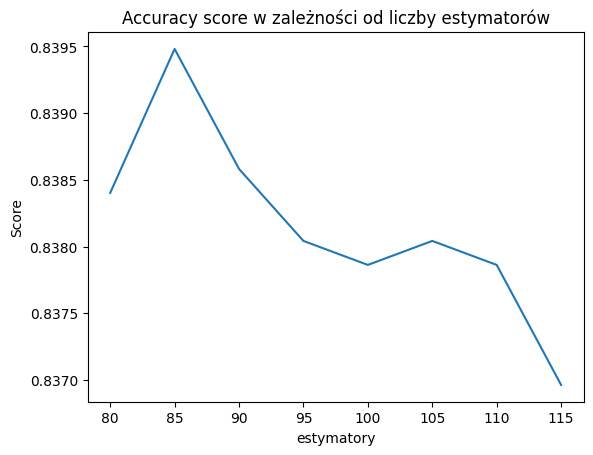

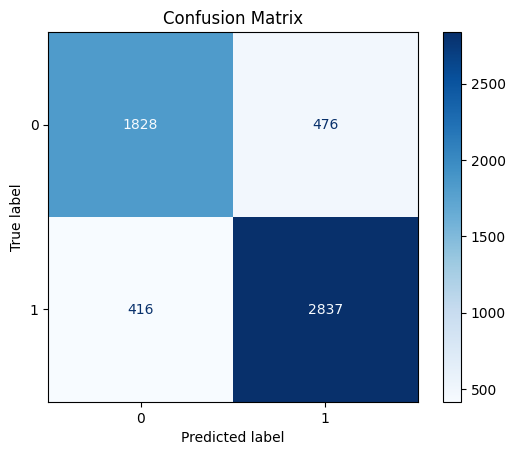

In [ ]:
forest = RandomForest(X_train_process, X_test_process, y_train, y_test)

prezentacja danych

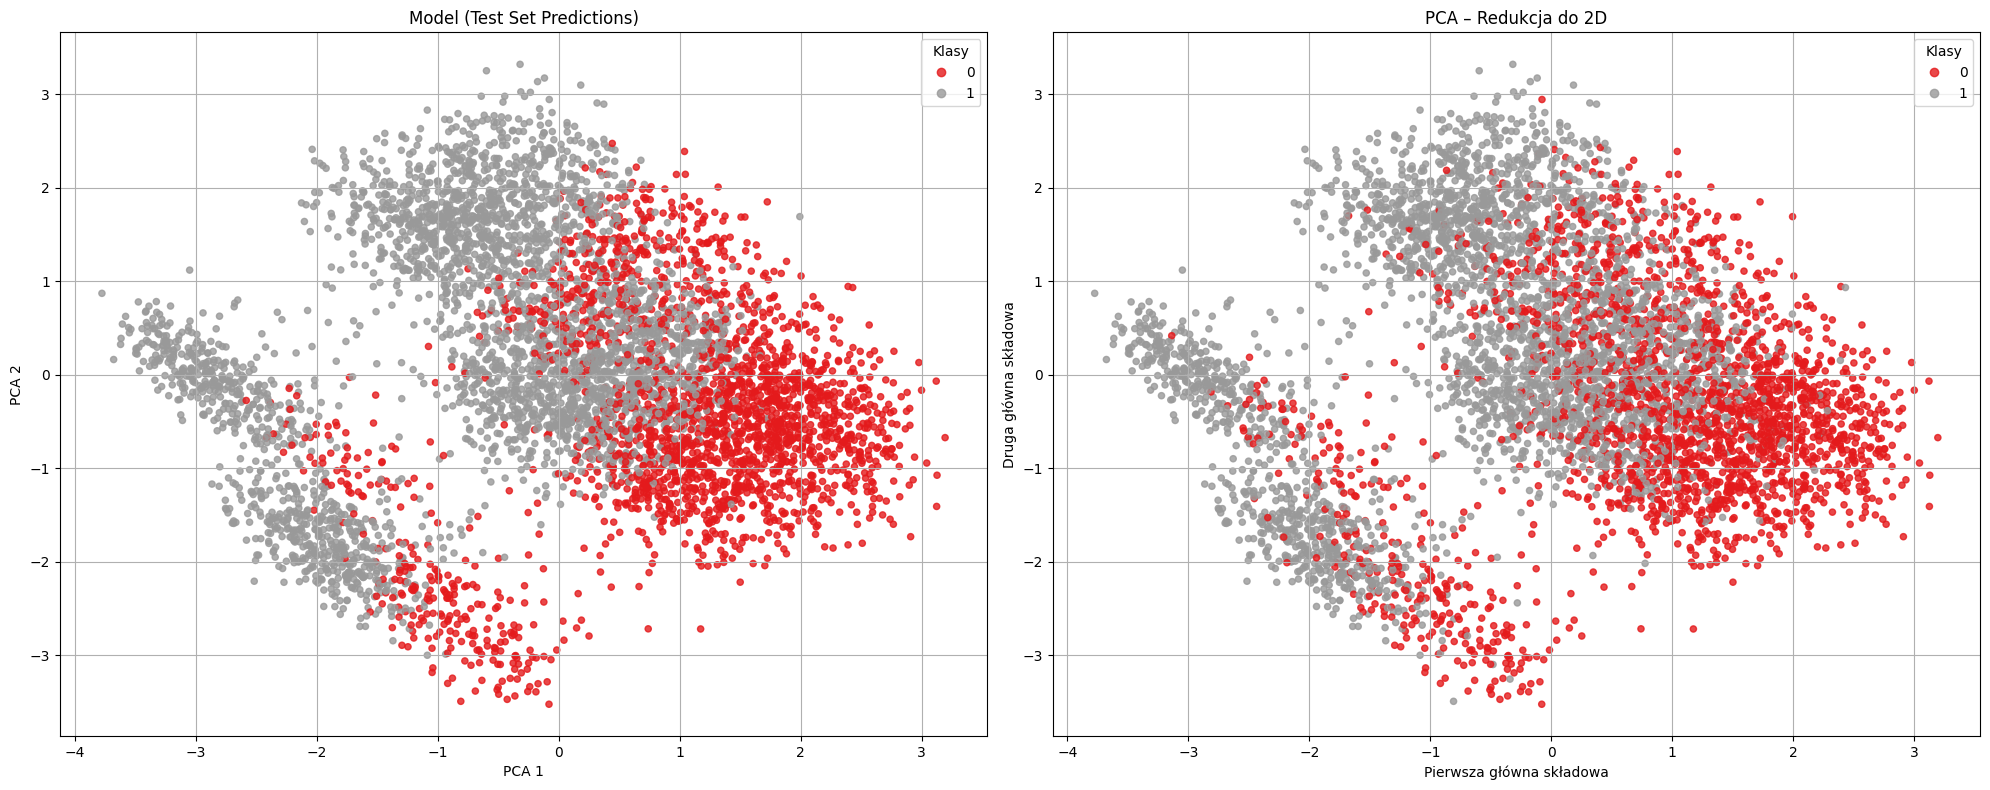

In [ ]:
showModel(forest)

<h2>Tesowanie na danych zbalansowanych


In [ ]:
#svm_bal = SVM(X_train_bal, X_test_process, y_train_bal, y_test)

              precision    recall  f1-score   support

           0       0.79      0.84      0.82      2304
           1       0.88      0.84      0.86      3253

    accuracy                           0.84      5557
   macro avg       0.84      0.84      0.84      5557
weighted avg       0.84      0.84      0.84      5557



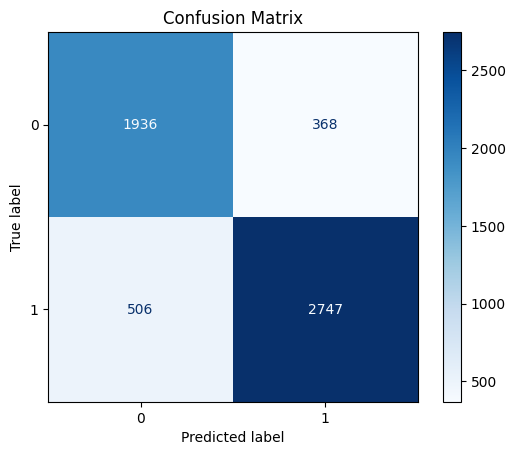

In [ ]:
log_reg_model_bal = LogReg(X_train_bal, X_test_process, y_train_bal, y_test)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2304
           1       0.85      0.85      0.85      3253

    accuracy                           0.83      5557
   macro avg       0.82      0.82      0.82      5557
weighted avg       0.83      0.83      0.83      5557



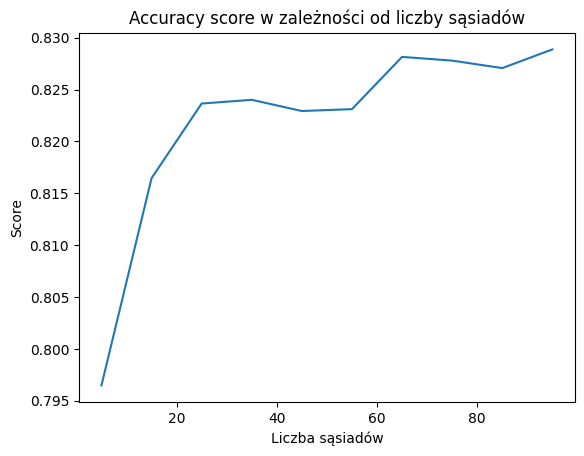

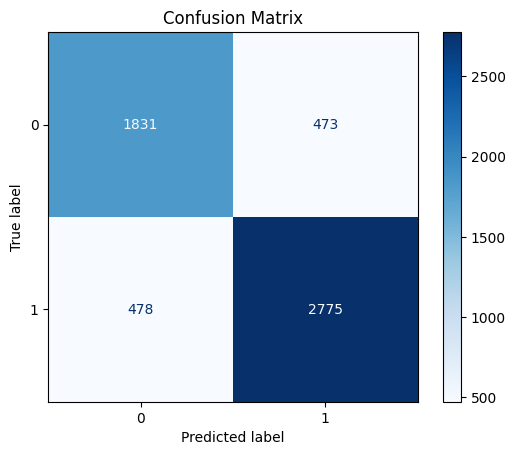

In [ ]:
knn_model_bal = KNN(X_train_bal, X_test_process, y_train_bal, y_test)

              precision    recall  f1-score   support

           0       0.78      0.83      0.81      2304
           1       0.87      0.84      0.86      3253

    accuracy                           0.83      5557
   macro avg       0.83      0.83      0.83      5557
weighted avg       0.84      0.83      0.84      5557



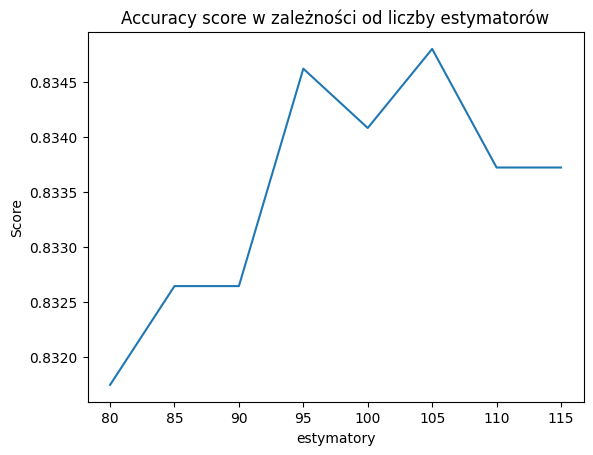

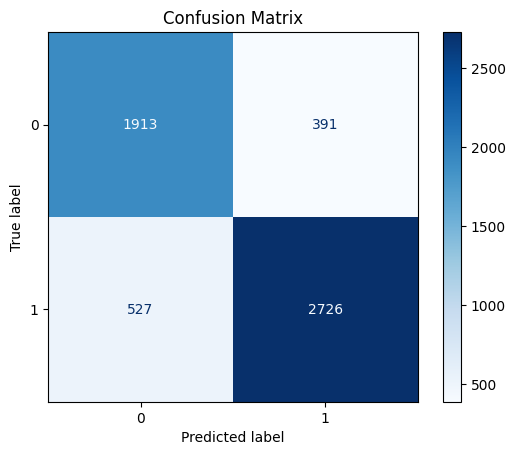

In [ ]:
forest_bal = RandomForest(X_train_bal, X_test_process, y_train_bal, y_test)

<h2>Po PCA

In [ ]:
#svm_pca = SVM(X_train_pca, X_test_pca, y_train, y_test)

              precision    recall  f1-score   support

           0       0.73      0.70      0.72      2304
           1       0.80      0.82      0.81      3253

    accuracy                           0.77      5557
   macro avg       0.77      0.76      0.76      5557
weighted avg       0.77      0.77      0.77      5557



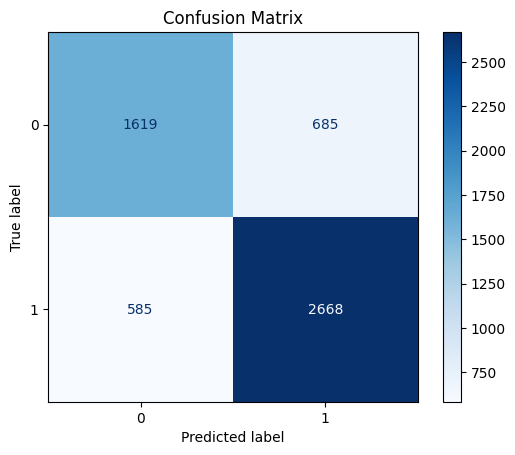

In [ ]:
log_reg_model_pca = LogReg(X_train_pca, X_test_pca, y_train, y_test)

              precision    recall  f1-score   support

           0       0.80      0.69      0.74      2304
           1       0.80      0.88      0.84      3253

    accuracy                           0.80      5557
   macro avg       0.80      0.78      0.79      5557
weighted avg       0.80      0.80      0.80      5557



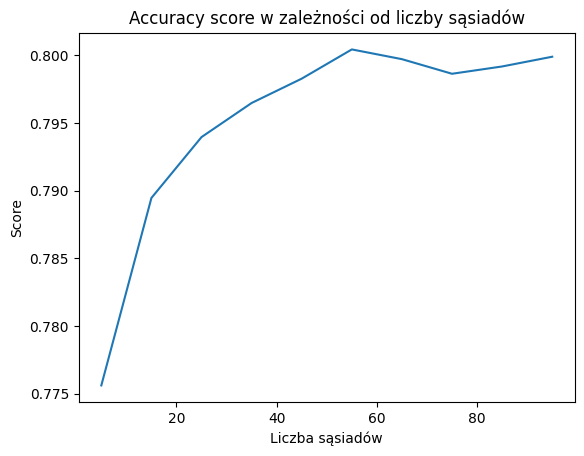

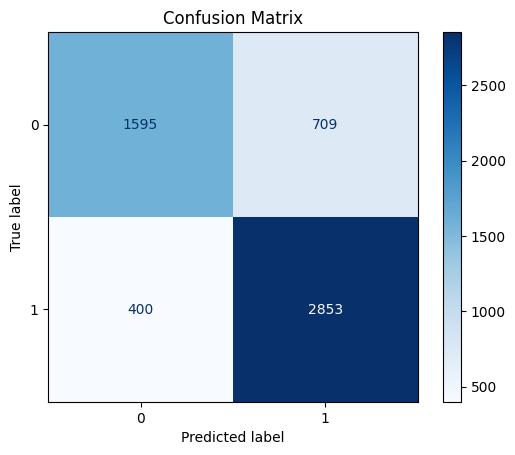

In [ ]:
knn_model_pca = KNN(X_train_pca, X_test_pca, y_train, y_test)

              precision    recall  f1-score   support

           0       0.75      0.70      0.73      2304
           1       0.80      0.83      0.82      3253

    accuracy                           0.78      5557
   macro avg       0.77      0.77      0.77      5557
weighted avg       0.78      0.78      0.78      5557



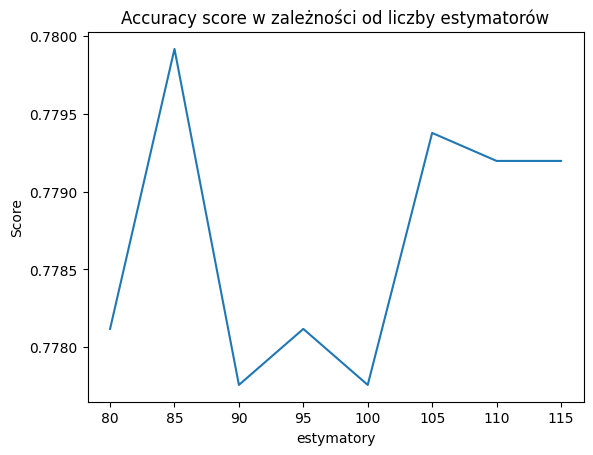

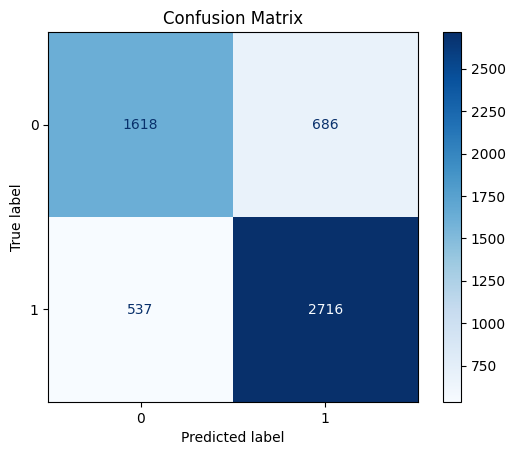

In [ ]:
forest_pca = RandomForest(X_train_pca, X_test_pca, y_train, y_test)

<h2>Po Oversamplingu

In [ ]:
#svm_sm = SVM(X_train_sm, X_test_process, y_train_sm, y_test)

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      2304
           1       0.88      0.85      0.86      3253

    accuracy                           0.84      5557
   macro avg       0.84      0.84      0.84      5557
weighted avg       0.84      0.84      0.84      5557



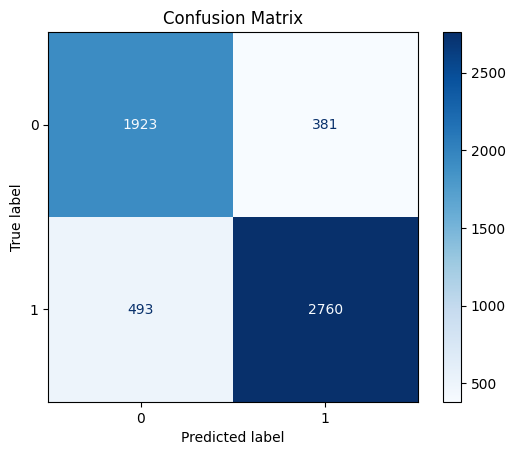

In [ ]:
logRes_sm = LogReg(X_train_sm, X_test_process, y_train_sm, y_test)

              precision    recall  f1-score   support

           0       0.78      0.81      0.79      2304
           1       0.86      0.84      0.85      3253

    accuracy                           0.83      5557
   macro avg       0.82      0.82      0.82      5557
weighted avg       0.83      0.83      0.83      5557



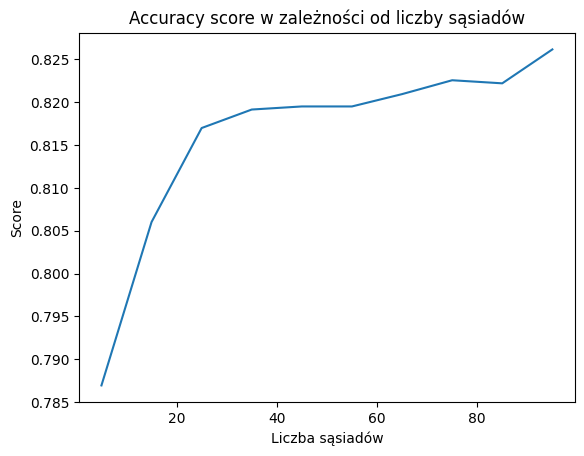

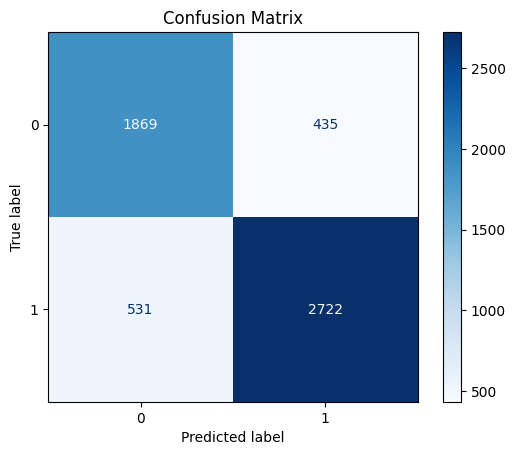

In [ ]:
knn_sm = KNN(X_train_sm, X_test_process, y_train_sm, y_test)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2304
           1       0.86      0.86      0.86      3253

    accuracy                           0.84      5557
   macro avg       0.83      0.83      0.83      5557
weighted avg       0.84      0.84      0.84      5557



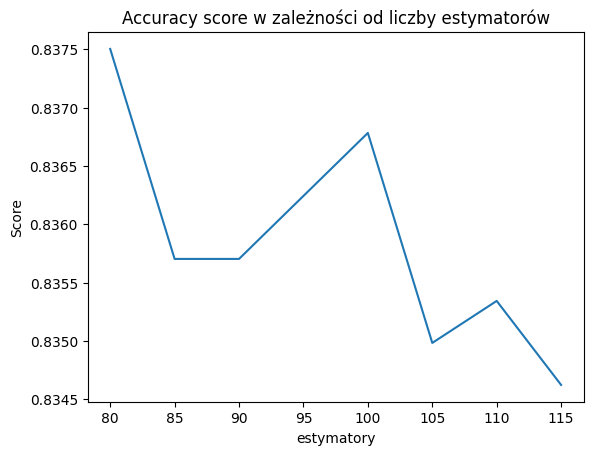

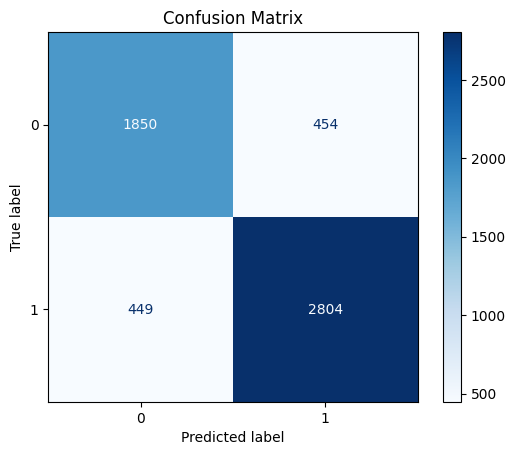

In [ ]:
forest_sm = RandomForest(X_train_sm, X_test_process, y_train_sm, y_test)

<h2>Podsumowanie dla najlepsze zbioru

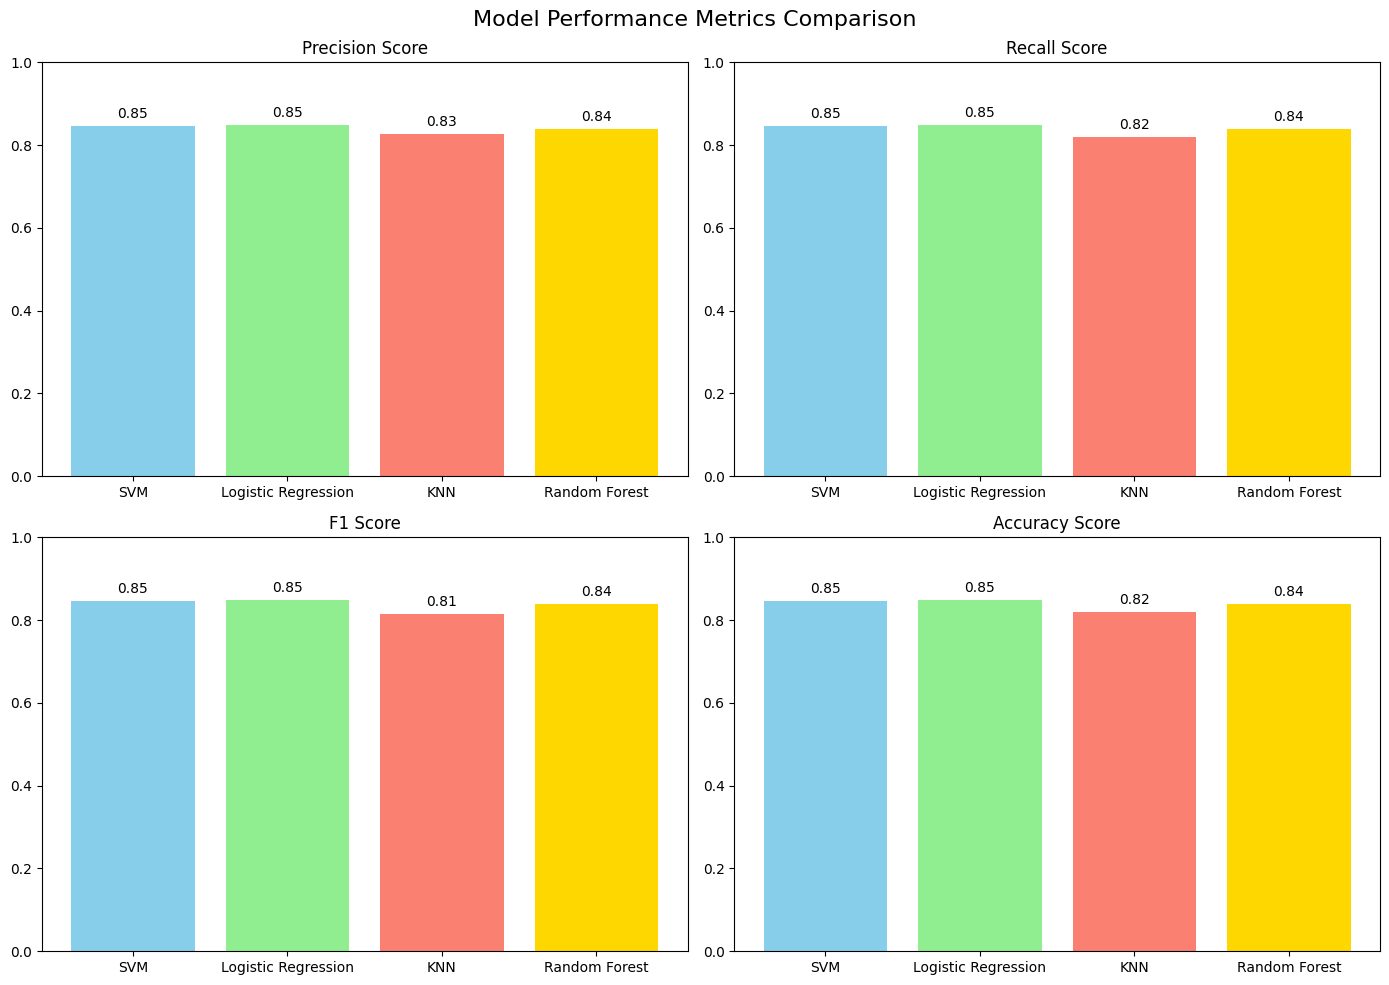

In [ ]:
y_pred_svm = svm.predict(X_test_process)
y_pred_lgrg = log_reg_model.predict(X_test_process)
y_pred_knn = knn_model.predict(X_test_process)
y_pred_frst = forest.predict(X_test_process)

names = ['SVM','Logistic Regression','KNN','Random Forest']

precision = [
    precision_score(y_test, y_pred_svm, average='weighted'),
    precision_score(y_test, y_pred_lgrg, average='weighted'),
    precision_score(y_test, y_pred_knn, average='weighted'),
    precision_score(y_test, y_pred_frst, average='weighted')
]

recall = [
    recall_score(y_test, y_pred_svm, average='weighted'),
    recall_score(y_test, y_pred_lgrg, average='weighted'),
    recall_score(y_test, y_pred_knn, average='weighted'),
    recall_score(y_test, y_pred_frst, average='weighted')
]

f1_scores = [
    f1_score(y_test, y_pred_svm, average='weighted'),
    f1_score(y_test, y_pred_lgrg, average='weighted'),
    f1_score(y_test, y_pred_knn, average='weighted'),
    f1_score(y_test, y_pred_frst, average='weighted')
]

accuracy = [
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_lgrg),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_frst)
]


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Performance Metrics Comparison', fontsize=16)


ax1.bar(names, precision, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
ax1.set_title('Precision Score')
ax1.set_ylim(0, 1)
for i, v in enumerate(precision):
    ax1.text(i, v + 0.02, f"{v:.2f}", ha='center')

ax2.bar(names, recall, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
ax2.set_title('Recall Score')
ax2.set_ylim(0, 1)
for i, v in enumerate(recall):
    ax2.text(i, v + 0.02, f"{v:.2f}", ha='center')

ax3.bar(names, f1_scores, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
ax3.set_title('F1 Score')
ax3.set_ylim(0, 1)
for i, v in enumerate(f1_scores):
    ax3.text(i, v + 0.02, f"{v:.2f}", ha='center')

ax4.bar(names, accuracy, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
ax4.set_title('Accuracy Score')
ax4.set_ylim(0, 1)
for i, v in enumerate(accuracy):
    ax4.text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()
